#### This is a standalone file to allow users to explore the likelihood of models compared to Kepler transit multiplicities across our 3D parameter space.

The only other file needed, logLs_incremental_corrected.txt, is the model results, which can be accessed through Dropbox (you just need to sign in on your account). Caution: it's 112 MB! https://www.dropbox.com/sh/ijtx58sty860aim/AABVScv0AqlTjzWPNPnC4Cd3a?dl=0

In [1]:
import numpy as np
import pandas as pd
from math import lgamma
from ast import literal_eval, parse
import matplotlib as mpl
import matplotlib.pyplot as plt
#%matplotlib inline
#path = 

k = pd.Series([833, 134, 38, 15, 5, 0]) # "ground truth" Kepler transit multiplicity

In [2]:
#https://stackoverflow.com/questions/52232742/how-to-use-ast-literal-eval-in-a-pandas-dataframe-and-handle-exceptions
def literal_eval_w_exceptions(x):
    try:
        return literal_eval(str(x))   
    except Exception as e:
        #print(e)
        pass
    
def float_w_exceptions(x):
    try:
        return float(x)   
    except Exception as e:
        #print(e)
        pass

In [467]:
# change path here to get logLs_incremental_corrected.txt
df = pd.read_csv('hipergator/logLs_incremental_corrected.txt', sep='\t', error_bad_lines=False, skiprows=1, index_col=False,
                 names=['filename','m','b','c','f','logL','transit_multiplicity','intact_frac',
                            'disrupted_frac','intact_logL','intact_transit_multiplicity','disrupted_logL',
                        'disrupted_transit_multiplicity','young10_logL','young10_transit_multiplicity',
                        'old10_logL','old10_transit_multiplicity','young15_logL','young15_transit_multiplicity',
                        'old15_logL','old15_transit_multiplicity','young20_logL','young20_transit_multiplicity',
                        'old20_logL','old20_transit_multiplicity','young25_logL','young25_transit_multiplicity',
                        'old25_logL','old25_transit_multiplicity','young30_logL','young30_transit_multiplicity',
                        'old30_logL','old30_transit_multiplicity','young35_logL','young35_transit_multiplicity',
                        'old35_logL','old35_transit_multiplicity','young40_logL','young40_transit_multiplicity',
                        'old40_logL','old40_transit_multiplicity','young45_logL','young45_transit_multiplicity',
                        'old45_logL','old45_transit_multiplicity','young50_logL','young50_transit_multiplicity',
                        'old50_logL','old50_transit_multiplicity'], dtype=str)
print(df.head())
#print(df.columns)
print(df.transit_multiplicity[0])
#print(df.logL)

df.transit_multiplicity = df.transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
#df.transit_multiplicity = df.transit_multiplicity.apply(lambda y: np.nan if len(y)==0 else y)
#df.logL = df.logL.apply(str) # convert back from string to list of floats
df.logL = df.logL.apply(float_w_exceptions) # convert back from string to list of floats
df.m = df.m.apply(float_w_exceptions) # convert back from string to list of floats
df.b = df.b.apply(float_w_exceptions) # convert back from string to list of floats
df.c = df.c.apply(float_w_exceptions) # convert back from string to list of floats
df.f = df.f.apply(float_w_exceptions) # convert back from string to list of floats
df.intact_frac = df.intact_frac.apply(float_w_exceptions) # convert back from string to list of floats
df.disrupted_frac = df.disrupted_frac.apply(float_w_exceptions) # convert back from string to list of floats
df.intact_logL = df.intact_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.intact_transit_multiplicity = df.intact_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.disrupted_logL = df.disrupted_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.disrupted_transit_multiplicity = df.disrupted_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.young10_logL = df.young10_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.young10_transit_multiplicity = df.young10_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.old10_logL = df.old10_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.old10_transit_multiplicity = df.old10_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.young15_logL = df.young15_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.young15_transit_multiplicity = df.young15_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.old15_logL = df.old15_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.old15_transit_multiplicity = df.old15_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.young20_logL = df.young20_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.young20_transit_multiplicity = df.young20_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.old20_logL = df.old20_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.old20_transit_multiplicity = df.old20_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.young25_logL = df.young25_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.young25_transit_multiplicity = df.young25_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.old25_logL = df.old25_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.old25_transit_multiplicity = df.old25_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.young30_logL = df.young30_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.young30_transit_multiplicity = df.young30_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.old30_logL = df.old30_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.old30_transit_multiplicity = df.old30_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.young35_logL = df.young35_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.young35_transit_multiplicity = df.young35_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.old35_logL = df.old35_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.old35_transit_multiplicity = df.old35_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.young40_logL = df.young40_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.young40_transit_multiplicity = df.young40_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.old40_logL = df.old40_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.old40_transit_multiplicity = df.old40_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.young45_logL = df.young45_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.young45_transit_multiplicity = df.young45_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.old45_logL = df.old45_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.old45_transit_multiplicity = df.old45_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.young50_logL = df.young50_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.young50_transit_multiplicity = df.young50_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.old50_logL = df.old50_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.old50_transit_multiplicity = df.old50_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats


                                            filename     m    b            c  \
0  /blue/sarahballard/c.lam/sculpting2/simulation...  -2.0  0.0  100000000.0   
1  /blue/sarahballard/c.lam/sculpting2/simulation...  -2.0  0.0  100000000.0   
2  /blue/sarahballard/c.lam/sculpting2/simulation...  -2.0  0.0  100000000.0   
3  /blue/sarahballard/c.lam/sculpting2/simulation...  -2.0  0.0  100000000.0   
4  /blue/sarahballard/c.lam/sculpting2/simulation...  -2.0  0.0  100000000.0   

     f                logL transit_multiplicity intact_frac disrupted_frac  \
0  0.0  -5434.568554576411           [0.0, 0.0]         0.0            0.0   
1  0.0  -5434.568554576411           [0.0, 0.0]         0.0            0.0   
2  0.0  -5434.568554576411           [0.0, 0.0]         0.0            0.0   
3  0.0  -5434.568554576411           [0.0, 0.0]         0.0            0.0   
4  0.0  -5434.568554576411           [0.0, 0.0]         0.0            0.0   

          intact_logL  ...          old40_logL old

In [4]:
df = df.loc[(df.m <= 0.) & (df.m >= -2.) & (df.b >= 0.) & (df.b <= 1.) & (df.logL <= 0.)].dropna(subset=['logL'])

In [5]:
def normalize(curr_row: pd.Series):
    """
    First, remove fraction of planet-hosting systems from each multiplicity. 
    Then, normalize against sample total planet-hosting systems. 
    """
    #print(curr_row)
    first = curr_row['transit_multiplicity']
    first += [0.] * (6 - len(first)) # pad with zeros to match length of k
    second = curr_row['f']
    #print(first)
    #print(second)
    
    try:
        # remove previous normalization
        first = [np.array(fl)/second for fl in first]
    
        # normalize against Kepler data s.t. sum of every transit multiplicity is 1025
        return [np.array(fl)*sum(k)/sum(first) for fl in first]
    
    except Exception as e: # return list of N nans, where N is length of transit multiplicity array    
        print(e)
        try: # eg. divide by zero for f=0; we don't care about those
            return np.nan*np.ones(len(first))
        
        except: # eg. accessed one too many levels
            return np.nan

def normalized_loglike(lam):
    """
    Calculate Poisson log likelihood
    Changed 0 handling from simulate.py to reflect https://www.aanda.org/articles/aa/pdf/2009/16/aa8472-07.pdf

    Params: 
    - lam: model predictions for transit multiplicity (list of floats)
    - normalized_k: Kepler transit multiplicity divided by sum(k) (list of floats)

    Returns: Poisson log likelihood (float)
    """
    logL = []
    try:
        for i in range(len(lam)):
            if lam[i]==0:
                term3 = -lgamma(k[i]+1)
                term2 = -lam[i]
                term1 = 0
                logL.append(term1+term2+term3)

            else:
                term3 = -lgamma(k[i]+1)
                term2 = -lam[i]
                term1 = k[i]*np.log(lam[i])
                logL.append(term1+term2+term3)
    except:
        #print(lam)
        return np.nan
    
    return np.sum(logL)    

#normalized_k = k/sum(k)
df['normalized_transit_multiplicity'] = df.apply(func=normalize, axis=1)
#df['normalized_logL'] = better_loglike(df['normalized_transit_multiplicity'], normalized_k)
df['normalized_logL'] = df['normalized_transit_multiplicity'].apply(func=normalized_loglike)


/var/folders/h2/sp_lfvz5515bhg_y92psw7f80000gn/T/ipykernel_703/3235774913.py:15: RuntimeWarning: invalid value encountered in true_divide
  first = [np.array(fl)/second for fl in first]


### Log likelihood heatmap of discretely sampled models in 3D parameter space.

Parameters are: 1) how fast putative "dynamical sculpting" occurs (dP(intact)/dt), 2) the age at which dynamical sculpting ceases (cutoff time), and 3) the initial fraction of dynamically cool systems (initial P(intact)). 

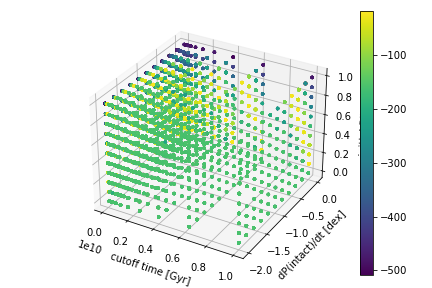

In [432]:
%matplotlib widget

fig = plt.figure()
ax = plt.axes(projection='3d')
im = ax.scatter3D(df.c, df.m, df.b, c=df.normalized_logL, s=5)
ax.set_xlabel('cutoff time [Gyr]')
#ax.set_xscale('log')
ax.set_ylabel('dP(intact)/dt [dex]')
ax.set_zlabel('initial P(intact)')
fig.colorbar(im, ax=ax)
fig.tight_layout()
plt.show()

### Same as above, but isolating only best models (logL >= -100)

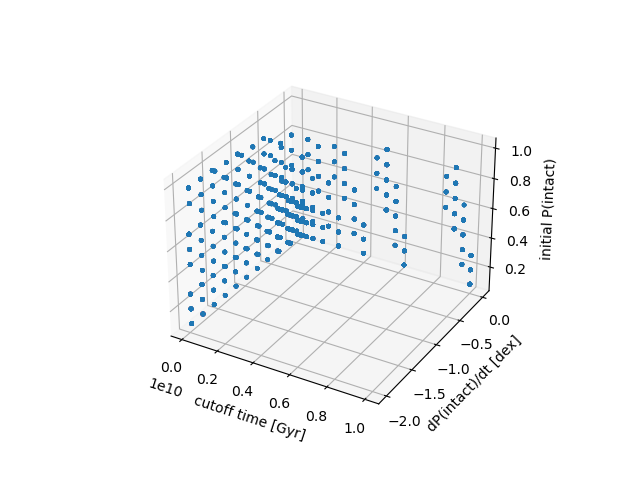

In [7]:
%matplotlib widget

df_keep = df.loc[df.normalized_logL >= -100]
#df_keep = df
fig = plt.figure()
ax = plt.axes(projection='3d')

#im = ax.scatter3D(df_keep.c, df_keep.m, df_keep.b, c=df_keep.normalized_logL, s=5)
im = ax.scatter3D(df_keep.c, df_keep.m, df_keep.b, s=5)
#im1 = ax.scatter3D(df_keep.loc[df_keep.index==1220].c, df_keep.loc[df_keep.index==1220].m, df_keep.loc[df_keep.index==1220].b, s=8, c='r')
#im2 = ax.scatter3D(df_keep.loc[df_keep.index==73279].c, df_keep.loc[df_keep.index==73279].c, df_keep.loc[df_keep.index==73279].c, s=8, c='purple')
ax.set_xlabel('cutoff time [Gyr]')
#ax.set_xscale('log')
ax.set_ylabel('dP(intact)/dt [dex]')
ax.set_zlabel('initial P(intact)')
#fig.colorbar(im, ax=ax)
#fig.tight_layout()
plt.show()

3D contour version of above plot

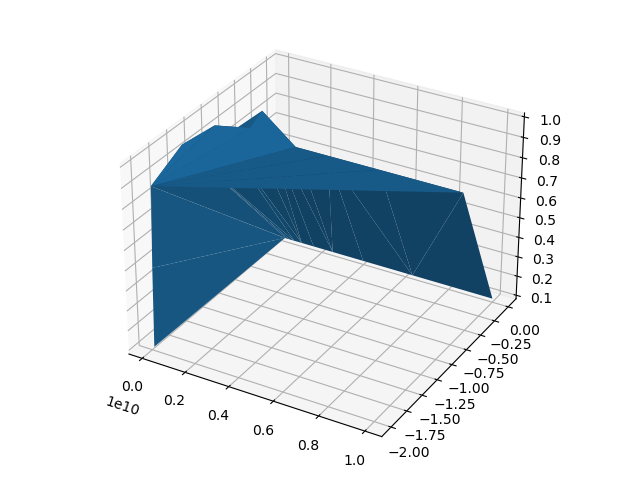

In [8]:
%matplotlib widget

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_trisurf(df_keep.c, df_keep.m, df_keep.b)
fig.tight_layout()
plt.show()

### Comparison of two "good" models

Colored in orange and purple in the 3D plot below are two models with logL > -30 (two of the best "good" models) that represent entirely different dynamical sculpting timescales. Orange corresponds with moderately fast dynamical sculpting that lasts 1 Gyr (as well as an initially high fraction of dynamically cool systems), while purple corresponds with slow dynamical sculpting that proceeds at cosmological timescales (as well as a moderate initial fraction of dynamically cool systems).

In [9]:
df_keep.loc[(df_keep.b == 0.5) & (df_keep.m > -2.)]

filename    m    b  \
18252  /blue/sarahballard/c.lam/sculpting2/simulation... -1.8  0.5   
18253  /blue/sarahballard/c.lam/sculpting2/simulation... -1.8  0.5   
18254  /blue/sarahballard/c.lam/sculpting2/simulation... -1.8  0.5   
18255  /blue/sarahballard/c.lam/sculpting2/simulation... -1.8  0.5   
18256  /blue/sarahballard/c.lam/sculpting2/simulation... -1.8  0.5   
...                                                  ...  ...  ...   
64807  /blue/sarahballard/c.lam/sculpting2/simulation... -0.2  0.5   
64808  /blue/sarahballard/c.lam/sculpting2/simulation... -0.2  0.5   
64809  /blue/sarahballard/c.lam/sculpting2/simulation... -0.2  0.5   
64810  /blue/sarahballard/c.lam/sculpting2/simulation... -0.2  0.5   
64811  /blue/sarahballard/c.lam/sculpting2/simulation... -0.2  0.5   

                  c    f         logL  \
18252  1.584893e+08  0.1  -248.018219   
18253  1.584893e+08  0.1  -257.146429   
18254  1.584893e+08  0.1  -243.369572   
18255  1.584893e+08  0.2   -25.342359   
18256  1.584893e+08  0.2   -27.870569   
...             ...  ...          ...   
64807  1.000000e+10  1.0 -2322.100671   
64808  1.000000e+10  1.0 -2264.328927   
64809  1.000000e+10  1.0 -2360.496923   
64810  1.000000e+10  1.0 -2255.867356   
64811  1.000000e+10  1.0 -2404.389423   

                                    transit_multiplicity  intact_frac  \
18252  [389.3, 59.7, 18.5, 12.4, 6.6000000000000005, ...     0.037345   
18253  [384.40000000000003, 60.5, 14.9, 13.7000000000...     0.037299   
18254  [388.6, 62.5, 20.3, 13.100000000000001, 5.8000...     0.037379   
18255  [778.6, 119.4, 37.0, 24.8, 13.200000000000001,...     0.074689   
18256  [768.8000000000001, 121.0, 29.8, 27.4000000000...     0.074599   
...                                                  ...          ...   
64807          [3858.0, 627.0, 212.0, 146.0, 70.0, 16.0]     0.418687   
64808          [3767.0, 608.0, 198.0, 164.0, 97.0, 14.0]     0.424547   
64809          [3831.0, 664.0, 221.0, 159.0, 84.0, 14.0]     0.422579   
64810          [3763.0, 597.0, 217.0, 173.0, 72.0, 17.0]     0.423178   
64811          [3926.0, 658.0, 214.0, 150.0, 69.0, 16.0]     0.421976   

       disrupted_frac  intact_logL  ... young45_logL  \
18252        0.062655 -1957.291906  ...  -793.188032   
18253        0.062701 -1981.325970  ...  -794.207741   
18254        0.062621 -1931.875578  ...  -779.180543   
18255        0.125311 -1346.016046  ...  -304.512172   
18256        0.125401 -1368.450110  ...  -306.231881   
...               ...          ...  ...          ...   
64807        0.581313  -481.371283  ...  -491.083230   
64808        0.575453  -492.067589  ...  -510.643458   
64809        0.577421  -529.591547  ...  -513.687839   
64810        0.576822  -518.730765  ...  -506.756575   
64811        0.578024  -502.737982  ...  -543.138032   

                            young45_transit_multiplicity  old45_logL  \
18252  [176.8, 26.900000000000002, 8.0, 5.7, 3.400000... -645.152830   
18253                  [172.9, 31.1, 7.0, 7.0, 4.0, 0.5] -668.908901   
18254  [176.60000000000002, 29.6, 9.0, 6.600000000000... -644.871561   
18255  [353.6, 53.800000000000004, 16.0, 11.4, 6.8000... -200.676970   
18256                [345.8, 62.2, 14.0, 14.0, 8.0, 1.0] -217.133041   
...                                                  ...         ...   
64807           [1737.0, 320.0, 114.0, 85.0, 43.0, 10.0] -654.317319   
64808           [1704.0, 325.0, 117.0, 99.0, 65.0, 10.0] -601.758658   
64809            [1710.0, 348.0, 126.0, 99.0, 44.0, 9.0] -666.909629   
64810          [1699.0, 333.0, 118.0, 107.0, 49.0, 11.0] -598.464390   
64811           [1777.0, 337.0, 135.0, 90.0, 41.0, 14.0] -664.672907   

                              old45_transit_multiplicity young50_logL  \
18252  [212.5, 32.800000000000004, 10.5, 6.7, 3.2, 0....  -704.792260   
18253  [211.5, 29.400000000000002, 7.9, 6.7, 2.300000...  -703.171564   
18254  [212.0, 32.9, 11.3, 6.5, 3.2, 0.6000000000000001]  -686.656226   
18255  

In [10]:
df_keep.loc[(df_keep.normalized_logL>-30) & (df_keep.c>=1e9) & (df_keep.m < 0)]

filename    m    b  \
39691  /blue/sarahballard/c.lam/sculpting2/simulation... -0.8  0.9   
39692  /blue/sarahballard/c.lam/sculpting2/simulation... -0.8  0.9   
39693  /blue/sarahballard/c.lam/sculpting2/simulation... -0.8  0.9   
39694  /blue/sarahballard/c.lam/sculpting2/simulation... -0.8  0.9   
39695  /blue/sarahballard/c.lam/sculpting2/simulation... -0.8  0.9   
...                                                  ...  ...  ...   
64797  /blue/sarahballard/c.lam/sculpting2/simulation... -0.2  0.5   
64801  /blue/sarahballard/c.lam/sculpting2/simulation... -0.2  0.5   
64804  /blue/sarahballard/c.lam/sculpting2/simulation... -0.2  0.5   
64807  /blue/sarahballard/c.lam/sculpting2/simulation... -0.2  0.5   
64811  /blue/sarahballard/c.lam/sculpting2/simulation... -0.2  0.5   

                  c    f         logL  \
39691  1.000000e+09  0.1  -267.712003   
39692  1.000000e+09  0.1  -266.212586   
39693  1.000000e+09  0.1  -269.731807   
39694  1.000000e+09  0.2   -23.236143   
39695  1.000000e+09  0.2   -25.236726   
...             ...  ...          ...   
64797  1.000000e+10  0.9 -1937.195200   
64801  1.000000e+10  0.9 -2009.083952   
64804  1.000000e+10  1.0 -2301.167570   
64807  1.000000e+10  1.0 -2322.100671   
64811  1.000000e+10  1.0 -2404.389423   

                                    transit_multiplicity  intact_frac  \
39691  [386.40000000000003, 54.800000000000004, 13.0,...     0.029211   
39692  [388.3, 52.6, 13.700000000000001, 10.100000000...     0.029550   
39693  [391.0, 52.900000000000006, 10.600000000000001...     0.029212   
39694  [772.8000000000001, 109.60000000000001, 26.0, ...     0.058422   
39695  [776.6, 105.2, 27.400000000000002, 20.20000000...     0.059101   
...                                                  ...          ...   
64797  [3472.2000000000003, 564.3000000000001, 190.8,...     0.376819   
64801          [3533.4, 592.2, 192.6, 135.0, 62.1, 14.4]     0.379779   
64804          [3809.0, 618.0, 235.0, 152.0, 70.0, 16.0]     0.420857   
64807          [3858.0, 627.0, 212.0, 146.0, 70.0, 16.0]     0.418687   
64811          [3926.0, 658.0, 214.0, 150.0, 69.0, 16.0]     0.421976   

       disrupted_frac  intact_logL  ... young45_logL  \
39691        0.070789 -2172.805779  ...  -810.659817   
39692        0.070450 -2216.367015  ...  -825.040497   
39693        0.070788 -2281.070847  ...  -812.432453   
39694        0.141578 -1533.329919  ...  -314.683957   
39695        0.140899 -1579.191155  ...  -326.164637   
...               ...          ...  ...          ...   
64797        0.523181  -473.965811  ...  -368.177759   
64801        0.520221  -489.632510  ...  -411.732561   
64804        0.579143  -469.171023  ...  -502.812804   
64807        0.581313  -481.371283  ...  -491.083230   
64811        0.578024  -502.737982  ...  -543.138032   

                            young45_transit_multiplicity  old45_logL  \
39691  [176.10000000000002, 26.5, 6.5, 3.2, 1.9000000... -687.141607   
39692  [173.9, 25.200000000000003, 5.800000000000001,... -669.387921   
39693   [178.5, 25.5, 5.1000000000000005, 3.6, 2.0, 0.5] -687.299146   
39694  [352.20000000000005, 53.0, 13.0, 6.4, 3.800000... -228.165747   
39695  [347.8, 50.400000000000006, 11.600000000000001... -216.812061   
...                                                  ...         ...   
64797  [1563.3, 288.0, 102.60000000000001, 76.5, 38.7... -500.311847   
64801           [1599.3, 303.3, 121.5, 81.0, 36.9, 12.6] -508.767435   
64804           [1697.0, 333.0, 144.0, 87.0, 44.0, 11.0] -633.875644   
64807           [1737.0, 320.0, 114.0, 85.0, 43.0, 10.0] -654.317319   
64811           [1777.0, 337.0, 135.0, 90.0, 41.0, 14.0] -664.672907   

                              old45_transit_multiplicity young50_logL  \
39691                  [210.3, 28.3, 6.5, 4.7, 1.3, 0.4]  -721.019542   
39692    [214.4, 27.400000000000002, 7.9, 5.5, 2.2, 0.5]  -729.477985   
39693  [212.5, 27.400000000000002, 5.5, 5.10000000000...  -724.720685   
39694  

In [11]:
print(df_keep.loc[df_keep.index==39691])
print(df_keep.loc[df_keep.index==64811])

                                                filename    m    b  \
39691  /blue/sarahballard/c.lam/sculpting2/simulation... -0.8  0.9   

                  c    f        logL  \
39691  1.000000e+09  0.1 -267.712003   

                                    transit_multiplicity  intact_frac  \
39691  [386.40000000000003, 54.800000000000004, 13.0,...     0.029211   

       disrupted_frac  intact_logL  ... young45_logL  \
39691        0.070789 -2172.805779  ...  -810.659817   

                            young45_transit_multiplicity  old45_logL  \
39691  [176.10000000000002, 26.5, 6.5, 3.2, 1.9000000... -687.141607   

              old45_transit_multiplicity young50_logL  \
39691  [210.3, 28.3, 6.5, 4.7, 1.3, 0.4]  -721.019542   

                            young50_transit_multiplicity  old50_logL  \
39691  [197.10000000000002, 30.200000000000003, 6.800... -771.815444   

                              old50_transit_multiplicity  \
39691  [189.3, 24.6, 6.2, 4.3, 1.1, 0.300000000000000

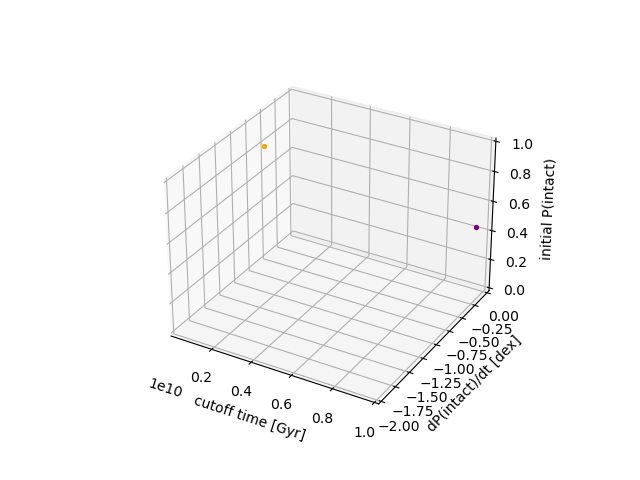

In [12]:
%matplotlib widget

df_keep = df.loc[df.normalized_logL >= -100]
#df_keep = df
fig = plt.figure()
ax = plt.axes(projection='3d')

#im = ax.scatter3D(df_keep.c, df_keep.m, df_keep.b, c=df_keep.normalized_logL, s=5)
#im = ax.scatter3D(df_keep.c, df_keep.m, df_keep.b, s=5)
one = 39691 # 1220
two = 64811 # 73279
im1 = ax.scatter3D(df_keep.loc[df_keep.index==one].c, df_keep.loc[df_keep.index==one].m, df_keep.loc[df_keep.index==one].b, s=8, c='orange')
im2 = ax.scatter3D(df_keep.loc[df_keep.index==two].c, df_keep.loc[df_keep.index==two].m, df_keep.loc[df_keep.index==two].b, s=8, c='purple')
ax.set_xlabel('cutoff time [Gyr]')
#ax.set_xscale('log')
ax.set_ylabel('dP(intact)/dt [dex]')
ax.set_xlim(1e8, 1e10)
ax.set_ylim(-2, 0)
ax.set_zlim(0, 1)
ax.set_zlabel('initial P(intact)')
#fig.colorbar(im, ax=ax)
#fig.tight_layout()
plt.show()

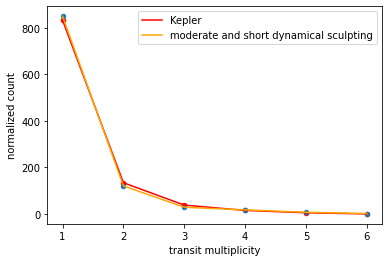

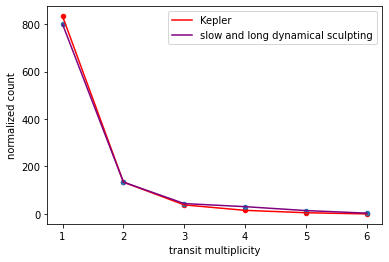

In [13]:
%matplotlib inline

temp_df = df_keep.loc[df_keep.index==one]
plt.plot(np.arange(len(k))+1, k, color='r', label='Kepler')
plt.scatter(np.arange(len(k))+1, k, color='r', s=20)
plt.plot(np.arange(len(k))+1, np.array(temp_df.normalized_transit_multiplicity)[0], label='moderate and short dynamical sculpting', color='orange')
plt.scatter(np.arange(len(k))+1, np.array(temp_df.normalized_transit_multiplicity)[0], s=20)
plt.xlabel('transit multiplicity')
plt.ylabel('normalized count')
plt.legend()
plt.show()

temp_df = df_keep.loc[df_keep.index==two]
plt.plot(np.arange(len(k))+1, k, color='r', label='Kepler')
plt.scatter(np.arange(len(k))+1, k, color='r', s=20)
plt.plot(np.arange(len(k))+1, np.array(temp_df.normalized_transit_multiplicity)[0], label='slow and long dynamical sculpting', color='purple')
plt.scatter(np.arange(len(k))+1, np.array(temp_df.normalized_transit_multiplicity)[0], s=20)
plt.xlabel('transit multiplicity')
plt.ylabel('normalized count')
plt.legend()
plt.show()

#### Let's explore why moderate sculpting over 1 Gyr can create the same "good" model as slow sculpting over ~10 Gyrs. 

In [14]:
path = '/Users/chrislam/Desktop/sculpting/'
pnum = pd.read_csv(path+'pnum_plus_cands_fgk.csv')
pnum = pnum.drop_duplicates(['kepid'])
k = pnum.koi_count.value_counts() 

7
119
142
125
125
105
90
88
61
48
115


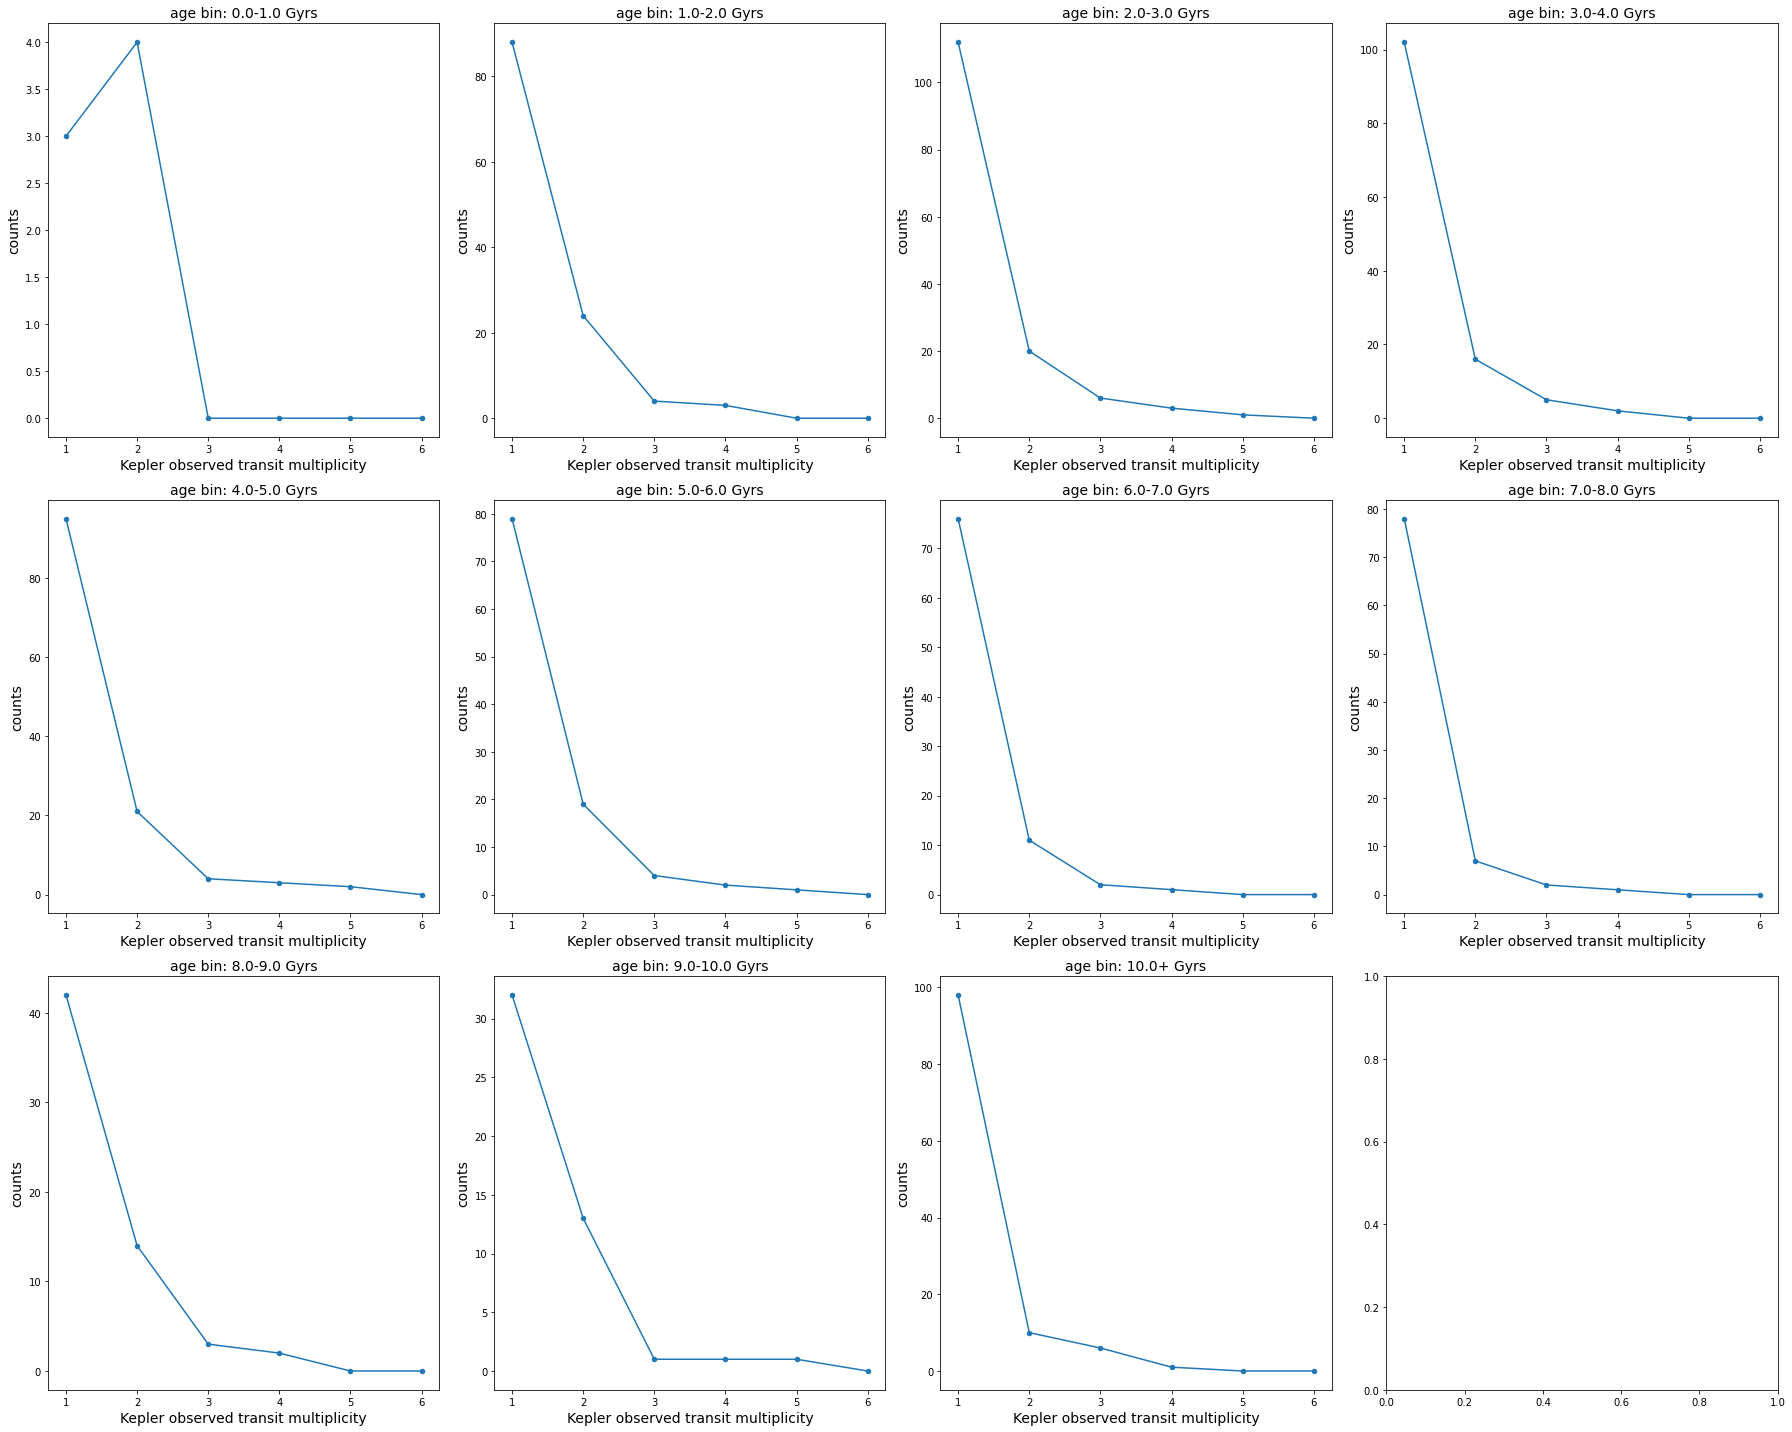

In [15]:
%matplotlib inline

fig, axes = plt.subplots(3,4, figsize=(25, 20), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.2, wspace=0.4)
axes = axes.ravel()

for i, a in enumerate(np.linspace(0,10,11)):
    if a < 10:
        temp = pnum.loc[(pnum.iso_age > a) & (pnum.iso_age <= a+1)]
        print(len(temp))
    else:
        temp = pnum.loc[pnum.iso_age > a]
        print(len(temp))
    
    k_temp = temp.koi_count.value_counts(sort=False)
    #k_temp = k_temp*np.sum(k)/np.sum(k_temp)
    #k_temp = k_temp/k_temp[1]
    k_temp = list(k_temp)
    k_temp += [0.] * (6 - len(k_temp)) # pad with zeros to match length of k
    
    ax = axes[i]
    ax.scatter(np.arange(len(k_temp))+1, k_temp, s=20)
    ax.plot(np.arange(len(k_temp))+1, k_temp)
    if a < 10:
        ax.set_title(f"age bin: {a}-{a+1} Gyrs", fontsize=14)
    else:
        ax.set_title(f"age bin: {a}+ Gyrs", fontsize=14)
    ax.set_xlabel('Kepler observed transit multiplicity', fontsize=14)
    ax.set_ylabel('counts', fontsize=14)

fig.tight_layout()
plt.savefig('observed_transit_multiplicities_by_age.png', format='png')
#plt.savefig('observed_transit_multiplicities_by_age_normalized.png', format='png')
plt.show()

126
267
230
178
109
115


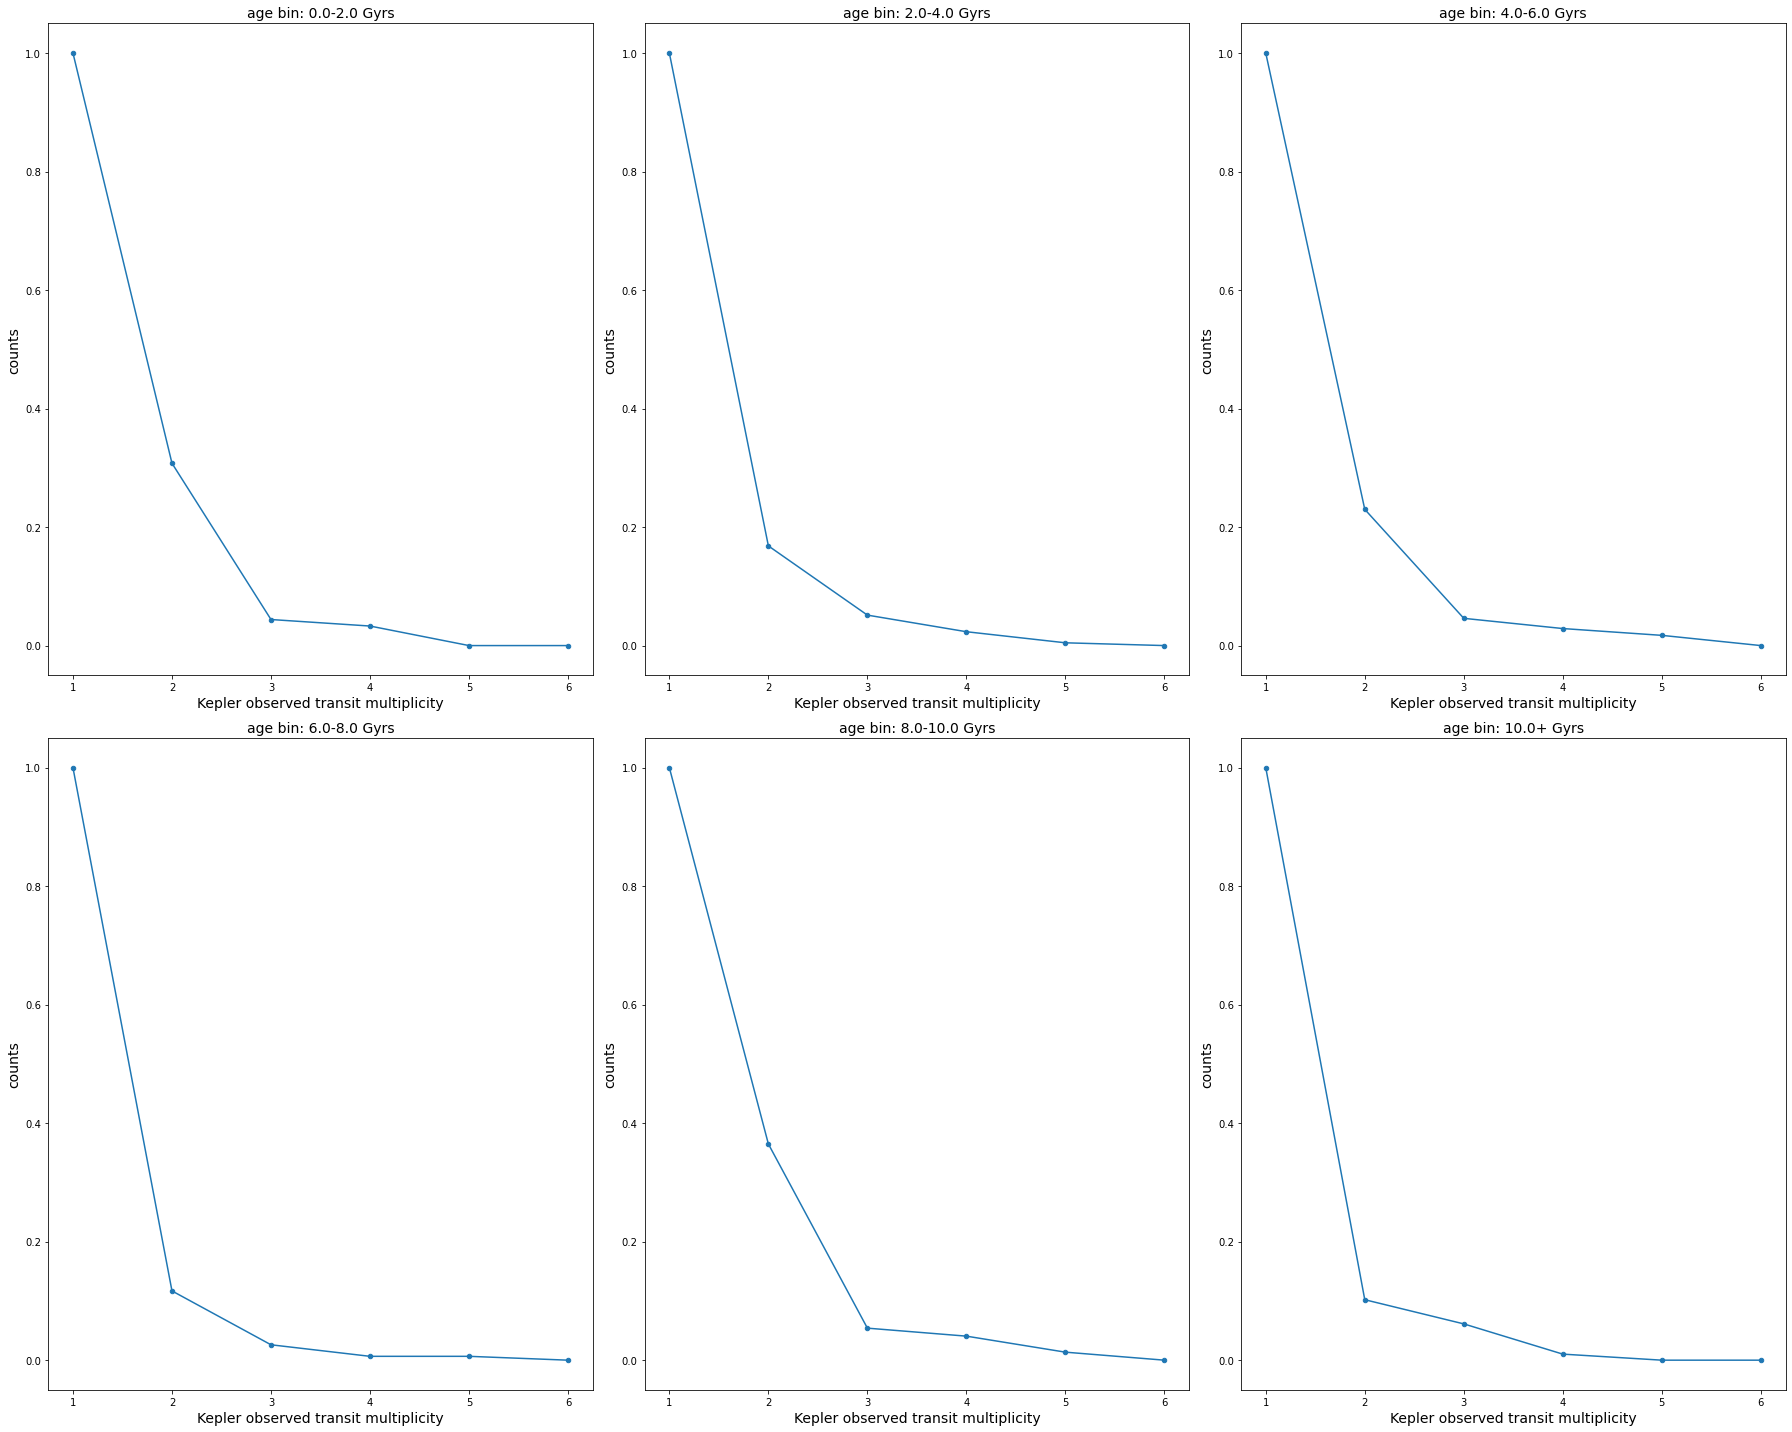

In [16]:
%matplotlib inline

fig, axes = plt.subplots(2,3, figsize=(25, 20), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.2, wspace=0.4)
axes = axes.ravel()

for i, a in enumerate(np.linspace(0,5,6)):
    if a < 5:
        temp = pnum.loc[(pnum.iso_age > a*2) & (pnum.iso_age <= a*2+2)]
        print(len(temp))
    else:
        temp = pnum.loc[pnum.iso_age > a*2]
        print(len(temp))
    
    k_temp = temp.koi_count.value_counts(sort=False)
    #k_temp = k_temp*np.sum(k)/np.sum(k_temp)
    k_temp = k_temp/k_temp[1]
    k_temp = list(k_temp)
    k_temp += [0.] * (6 - len(k_temp)) # pad with zeros to match length of k
    
    ax = axes[i]
    ax.scatter(np.arange(len(k_temp))+1, k_temp, s=20)
    ax.plot(np.arange(len(k_temp))+1, k_temp)
    if a < 5:
        ax.set_title(f"age bin: {2*a}-{2*a+2} Gyrs", fontsize=14)
    else:
        ax.set_title(f"age bin: {2*a}+ Gyrs", fontsize=14)
    ax.set_xlabel('Kepler observed transit multiplicity', fontsize=14)
    ax.set_ylabel('counts', fontsize=14)

fig.tight_layout()
#plt.savefig('observed_transit_multiplicities_by_age.png', format='png')
plt.savefig('observed_transit_multiplicities_by_age_normalized.png', format='png')
plt.show()

In [17]:
np.nanmedian(pnum.loc[(pnum.iso_age > 8.) & (pnum.iso_age < 10)].iso_teff)

5677.05

In [18]:
np.nanmedian(pnum.iso_teff)

5929.6

#### G dwarf only

0
no stars in that bin
0
no stars in that bin
4
33
67
95
79
83
59
44
97


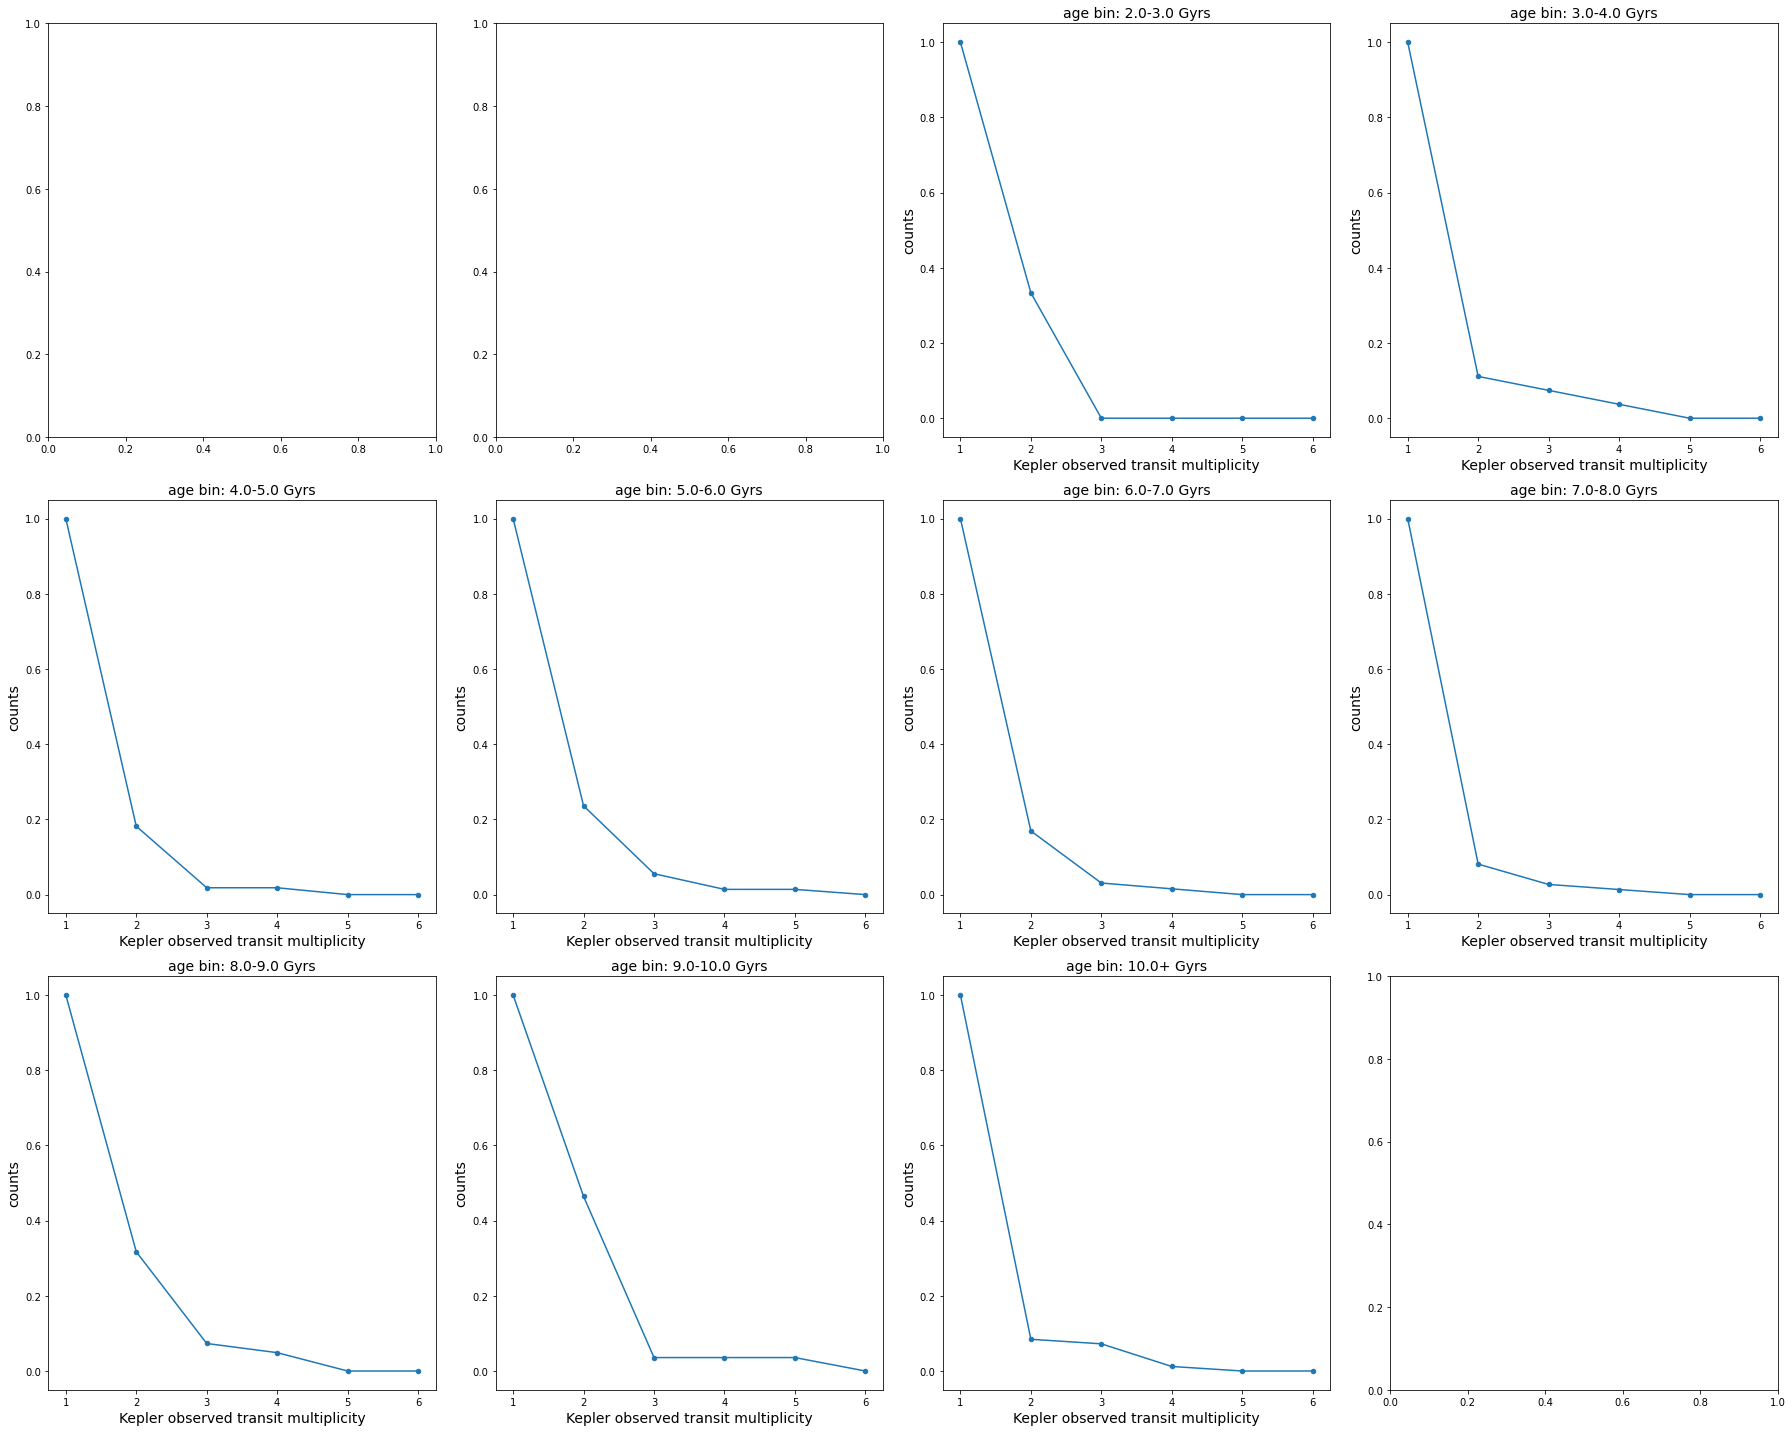

In [19]:
%matplotlib inline

fig, axes = plt.subplots(3,4, figsize=(25, 20), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.2, wspace=0.4)
axes = axes.ravel()
gpnum = pnum.loc[(pnum.iso_teff > 5300) & (pnum.iso_teff < 6000)]
#print(gpnum)
for i, a in enumerate(np.linspace(0,10,11)):
    try:
        if a < 10:
            temp = gpnum.loc[(gpnum.iso_age > a) & (gpnum.iso_age <= a+1)]
            print(len(temp))
        else:
            temp = gpnum.loc[pnum.iso_age > a]
            print(len(temp))

        k_temp = temp.koi_count.value_counts(sort=False)
        #k_temp = k_temp*np.sum(k)/np.sum(k_temp)
        k_temp = k_temp/k_temp[1]
        k_temp = list(k_temp)
        k_temp += [0.] * (6 - len(k_temp)) # pad with zeros to match length of k

        ax = axes[i]
        ax.scatter(np.arange(len(k_temp))+1, k_temp, s=20)
        ax.plot(np.arange(len(k_temp))+1, k_temp)
        if a < 10:
            ax.set_title(f"age bin: {a}-{a+1} Gyrs", fontsize=14)
        else:
            ax.set_title(f"age bin: {a}+ Gyrs", fontsize=14)
        ax.set_xlabel('Kepler observed transit multiplicity', fontsize=14)
        ax.set_ylabel('counts', fontsize=14)
    except:
        print("no stars in that bin")

fig.tight_layout()
#plt.savefig('observed_transit_multiplicities_by_age.png', format='png')
#plt.savefig('observed_transit_multiplicities_by_age_normalized.png', format='png')
plt.show()

#### F type only

7
119
138
92
58
9
5
1
0
no stars in that bin
0
no stars in that bin
0
no stars in that bin


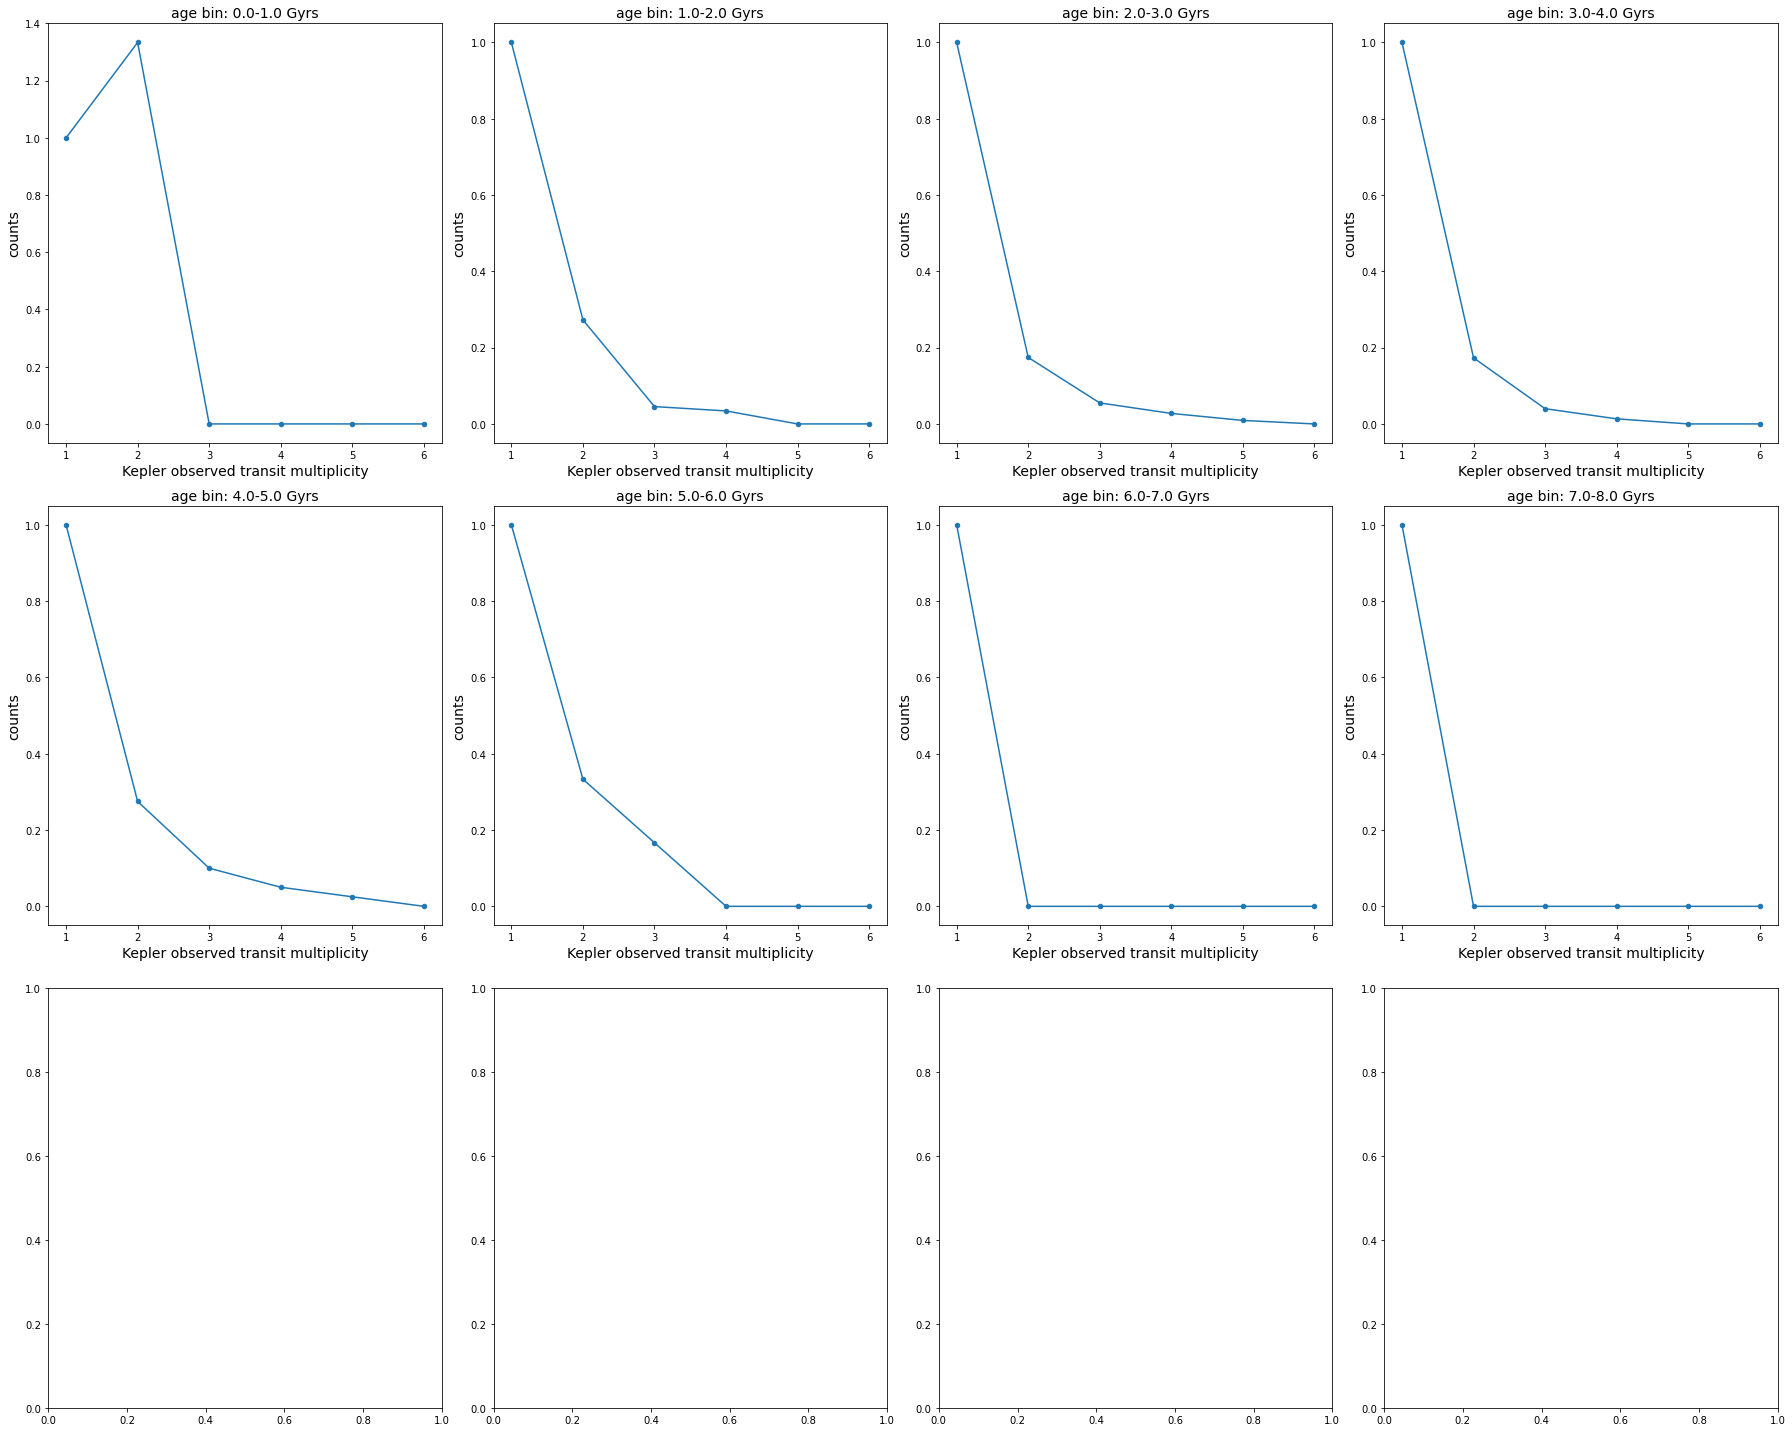

In [20]:
%matplotlib inline

fig, axes = plt.subplots(3,4, figsize=(25, 20), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.2, wspace=0.4)
axes = axes.ravel()
gpnum = pnum.loc[(pnum.iso_teff > 6000) & (pnum.iso_teff < 7600)]
#print(gpnum)
for i, a in enumerate(np.linspace(0,10,11)):
    try:
        if a < 10:
            temp = gpnum.loc[(gpnum.iso_age > a) & (gpnum.iso_age <= a+1)]
            print(len(temp))
        else:
            temp = gpnum.loc[pnum.iso_age > a]
            print(len(temp))

        k_temp = temp.koi_count.value_counts(sort=False)
        #k_temp = k_temp*np.sum(k)/np.sum(k_temp)
        k_temp = k_temp/k_temp[1]
        k_temp = list(k_temp)
        k_temp += [0.] * (6 - len(k_temp)) # pad with zeros to match length of k

        ax = axes[i]
        ax.scatter(np.arange(len(k_temp))+1, k_temp, s=20)
        ax.plot(np.arange(len(k_temp))+1, k_temp)
        if a < 10:
            ax.set_title(f"age bin: {a}-{a+1} Gyrs", fontsize=14)
        else:
            ax.set_title(f"age bin: {a}+ Gyrs", fontsize=14)
        ax.set_xlabel('Kepler observed transit multiplicity', fontsize=14)
        ax.set_ylabel('counts', fontsize=14)
    except:
        print("no stars in that bin")

fig.tight_layout()
#plt.savefig('observed_transit_multiplicities_by_age.png', format='png')
#plt.savefig('observed_transit_multiplicities_by_age_normalized.png', format='png')
plt.show()

#### K type

0
no stars in that bin
0
no stars in that bin
0
no stars in that bin
0
no stars in that bin
0
no stars in that bin
1
6
4
2
4
18


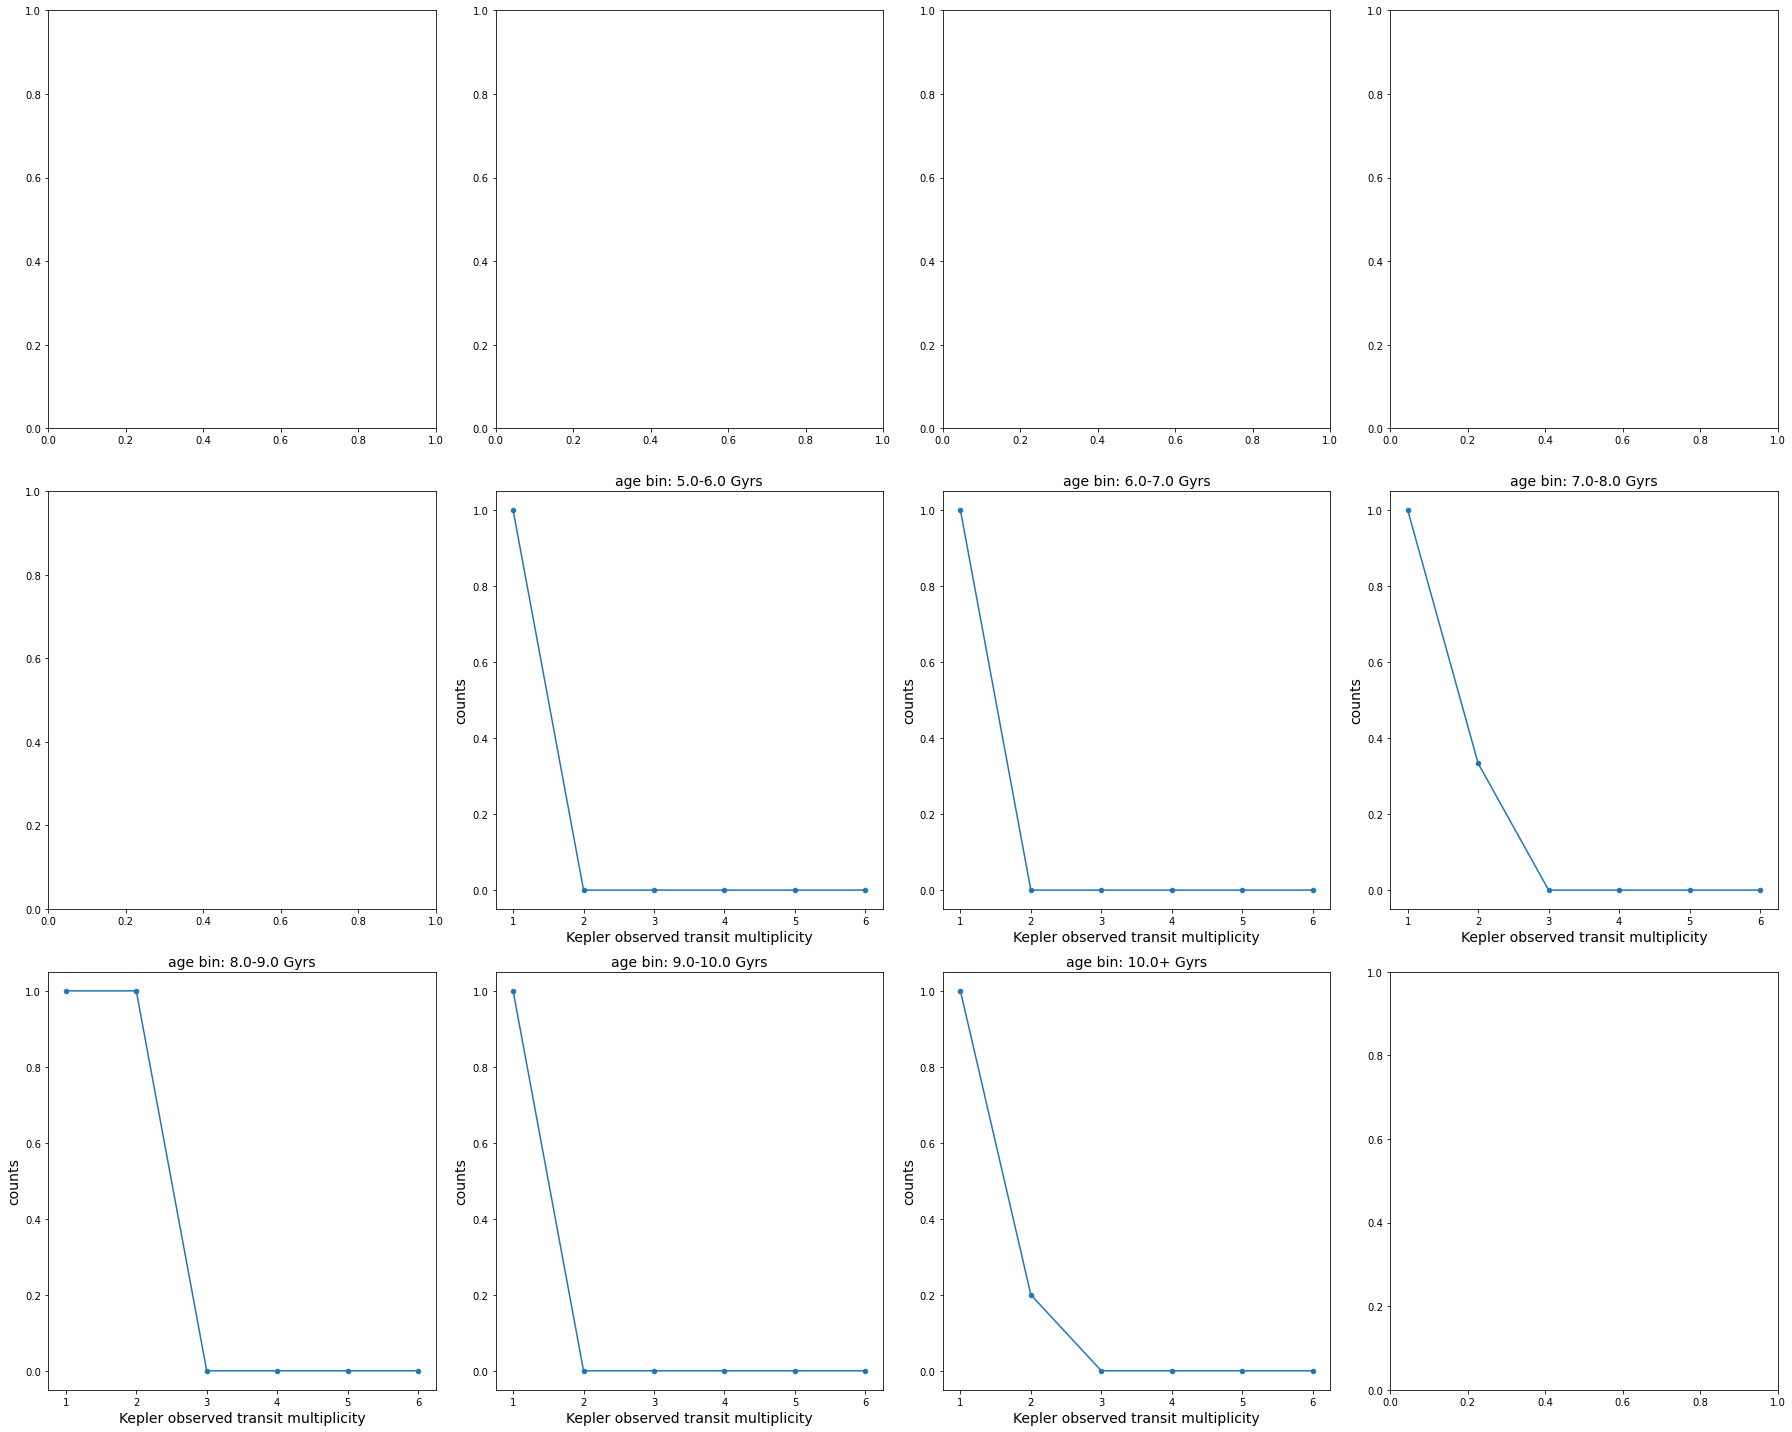

In [21]:
%matplotlib inline

fig, axes = plt.subplots(3,4, figsize=(25, 20), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.2, wspace=0.4)
axes = axes.ravel()
gpnum = pnum.loc[(pnum.iso_teff > 3900) & (pnum.iso_teff < 5300)]
#print(gpnum)
for i, a in enumerate(np.linspace(0,10,11)):
    try:
        if a < 10:
            temp = gpnum.loc[(gpnum.iso_age > a) & (gpnum.iso_age <= a+1)]
            print(len(temp))
        else:
            temp = gpnum.loc[pnum.iso_age > a]
            print(len(temp))

        k_temp = temp.koi_count.value_counts(sort=False)
        #k_temp = k_temp*np.sum(k)/np.sum(k_temp)
        k_temp = k_temp/k_temp[1]
        k_temp = list(k_temp)
        k_temp += [0.] * (6 - len(k_temp)) # pad with zeros to match length of k

        ax = axes[i]
        ax.scatter(np.arange(len(k_temp))+1, k_temp, s=20)
        ax.plot(np.arange(len(k_temp))+1, k_temp)
        if a < 10:
            ax.set_title(f"age bin: {a}-{a+1} Gyrs", fontsize=14)
        else:
            ax.set_title(f"age bin: {a}+ Gyrs", fontsize=14)
        ax.set_xlabel('Kepler observed transit multiplicity', fontsize=14)
        ax.set_ylabel('counts', fontsize=14)
    except:
        print("no stars in that bin")

fig.tight_layout()
#plt.savefig('observed_transit_multiplicities_by_age.png', format='png')
#plt.savefig('observed_transit_multiplicities_by_age_normalized.png', format='png')
plt.show()

#### Split by spectral type

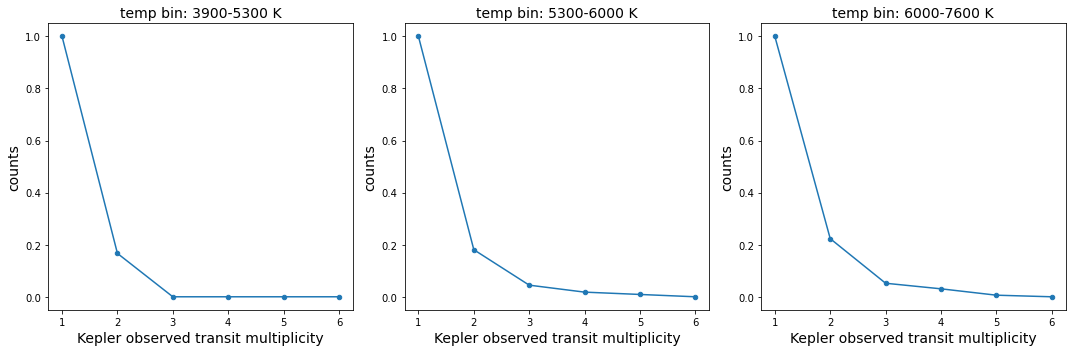

In [22]:
fig, axes = plt.subplots(1,3, figsize=(15, 5), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.2, wspace=0.4)
axes = axes.ravel()
temps = [3900, 5300, 6000, 7600]

for i, a in enumerate(temps):
    if i<3:
        temp = pnum.loc[(pnum.iso_teff > a) & (pnum.iso_teff < temps[i+1])]
        k_temp = temp.koi_count.value_counts(sort=False)
        #k_temp = k_temp*np.sum(k)/np.sum(k_temp)
        k_temp = k_temp/k_temp[1]
        k_temp = list(k_temp)
        k_temp += [0.] * (6 - len(k_temp)) # pad with zeros to match length of k

        ax = axes[i]
        ax.scatter(np.arange(len(k_temp))+1, k_temp, s=20)
        ax.plot(np.arange(len(k_temp))+1, k_temp)
        ax.set_title(f"temp bin: {temps[i]}-{temps[i+1]} K", fontsize=14)
        ax.set_xlabel('Kepler observed transit multiplicity', fontsize=14)
        ax.set_ylabel('counts', fontsize=14)

fig.tight_layout()
#plt.savefig('observed_transit_multiplicities_by_age.png', format='png')
#plt.savefig('observed_transit_multiplicities_by_age_normalized.png', format='png')
plt.show()

### Tasks for Sarah M

- Plot 2+:1 bin observed Kepler counts as function of age 
- Plot 2D heatmap of stellar age and temperature, with color as 2+:1 ratio (beware small number statistics, since the total is 1025)

7
119
142
125
125
105
90
88
61
48
41
22
52
13 11


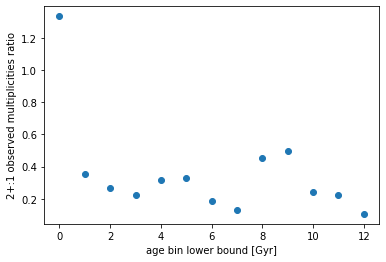

In [23]:
%matplotlib inline

#fig, axes = plt.subplots(3,4, figsize=(25, 20), facecolor='w', edgecolor='k')
#fig.subplots_adjust(hspace = 0.2, wspace=0.4)
#axes = axes.ravel()

ratios = []
for i, a in enumerate(np.linspace(0,12,13)):
    if a < 12:
        temp = pnum.loc[(pnum.iso_age > a) & (pnum.iso_age <= a+1)]
        print(len(temp))
    else:
        temp = pnum.loc[pnum.iso_age > a]
        print(len(temp))
    
    k_temp = temp.koi_count.value_counts(sort=False)
    #k_temp = k_temp*np.sum(k)/np.sum(k_temp)
    #k_temp = k_temp/k_temp[1]
    k_temp = list(k_temp)
    k_temp += [0.] * (6 - len(k_temp)) # pad with zeros to match length of k
    
    #print(k_temp)
    #print(k_temp[1]/k_temp[0])
    ratio = (np.sum(k_temp)-k_temp[0])/k_temp[0]
    ratios.append(ratio)

print(len(ratios), len(np.linspace(0,10,11)))
plt.scatter(np.linspace(0,12,13), ratios)
plt.ylabel('2+:1 observed multiplicities ratio')
plt.xlabel('age bin lower bound [Gyr]')
plt.savefig('observed_multiplicities_with_age.png', format='png')
plt.show()

In [24]:
def assign_stellar_type(row):
    if (row.iso_teff > 3900) & (row.iso_teff <= 5300):
        return 'k'
    elif (row.iso_teff > 5300) & (row.iso_teff <= 6000):
        return 'g'
    elif (row.iso_teff > 6000) & (row.iso_teff <= 7600):
        return 'f'
    
def assign_age_bin(row): # meh, found a way around this so never mind
    if (row.iso_age > 0) & (row.iso_age <= 1):
        return 1
    

0 0 7
0 0 119
0 4 138
0 33 92
0 67 58
1 95 9
6 79 5
4 83 1
2 59 0
4 44 0
4 37 0
3 19 0
11 41 0
39 13
         0         1         2         3         4         5         6   \
K       NaN       NaN       NaN       NaN       NaN  0.000000  0.000000   
G       NaN       NaN  0.333333  0.222222  0.218182  0.319444  0.215385   
F  1.333333  0.352273  0.266055  0.226667  0.450000  0.500000  0.000000   

         7         8         9         10      11        12  
K  0.333333  1.000000  0.000000  0.333333  0.5000  0.100000  
G  0.121622  0.439024  0.571429  0.233333  0.1875  0.108108  
F  0.000000       NaN       NaN       NaN     NaN       NaN  


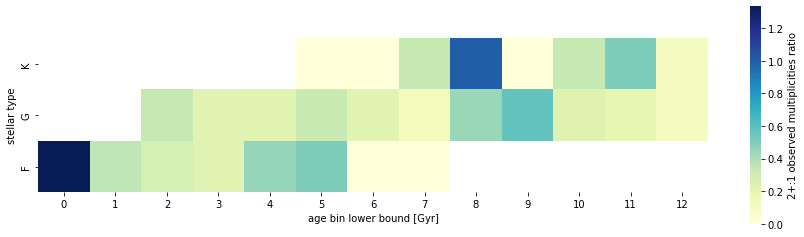

In [25]:
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#fig, axes = plt.subplots(3,4, figsize=(25, 20), facecolor='w', edgecolor='k')
#fig.subplots_adjust(hspace = 0.2, wspace=0.4)
#axes = axes.ravel()

ratios = []
for i, a in enumerate(np.linspace(0,12,13)):
    if a < 12:
        temp = pnum.loc[(pnum.iso_age > a) & (pnum.iso_age <= a+1)]
        temp['stellar_type'] = temp.apply(assign_stellar_type, axis=1)
        temp_k = temp.loc[(temp.iso_teff > 3900) & (temp.iso_teff <= 5300)]
        temp_g = temp.loc[(temp.iso_teff > 5300) & (temp.iso_teff <= 6000)]
        temp_f = temp.loc[(temp.iso_teff > 6000) & (temp.iso_teff <= 7600)]
        print(len(temp_k), len(temp_g), len(temp_f))
    else:
        temp = pnum.loc[pnum.iso_age > a]
        temp['stellar_type'] = temp.apply(assign_stellar_type, axis=1)
        temp_k = temp.loc[(temp.iso_teff > 3900) & (temp.iso_teff <= 5300)]
        temp_g = temp.loc[(temp.iso_teff > 5300) & (temp.iso_teff <= 6000)]
        temp_f = temp.loc[(temp.iso_teff > 6000) & (temp.iso_teff <= 7600)]
        print(len(temp_k), len(temp_g), len(temp_f))
    
    k_temp_k = temp_k.koi_count.value_counts(sort=False)
    k_temp_k = list(k_temp_k)
    k_temp_k += [0.] * (6 - len(k_temp_k)) # pad with zeros to match length of k
    
    k_temp_g = temp_g.koi_count.value_counts(sort=False)
    k_temp_g = list(k_temp_g)
    k_temp_g += [0.] * (6 - len(k_temp_g)) # pad with zeros to match length of k
    
    k_temp_f = temp_f.koi_count.value_counts(sort=False)
    k_temp_f = list(k_temp_f)
    k_temp_f += [0.] * (6 - len(k_temp_f)) # pad with zeros to match length of k

    ratio_k = (np.sum(k_temp_k)-k_temp_k[0])/k_temp_k[0]
    ratio_g = (np.sum(k_temp_g)-k_temp_g[0])/k_temp_g[0]
    ratio_f = (np.sum(k_temp_f)-k_temp_f[0])/k_temp_f[0]
    ratios.append(ratio_k)
    ratios.append(ratio_g)
    ratios.append(ratio_f)

print(len(ratios), len(np.linspace(0,12,13)))
ratios = np.array(ratios).reshape(13,3)

ratios_df = pd.DataFrame(ratios, columns = ['K','G','F']).T
print(ratios_df)
plt.figure(figsize=(15, 20))
sns.heatmap(ratios_df, square=True, cmap="YlGnBu", cbar_kws={'label': '2+:1 observed multiplicities ratio', "shrink": 0.2})
plt.xlabel('age bin lower bound [Gyr]')
plt.ylabel('stellar type')
plt.savefig('observed_multiplicities_with_age_type.png', format='png')
plt.show()

Bootstrap using stellar age uncertainties to try to obviate the small number statistics (spoiler: it won't really help).

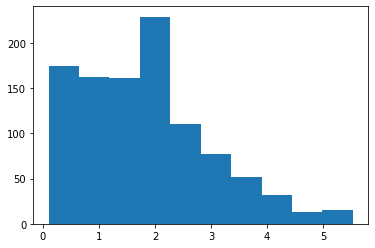

In [26]:
plt.hist(pnum.iso_age_err1)
plt.show()

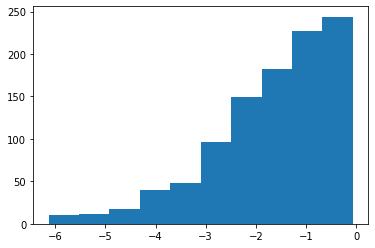

In [27]:
plt.hist(pnum.iso_age_err2)
plt.show()

In [28]:
# we will be drawing from a Guassian with width equal to the average of err1 and err2
pnum['iso_age_err'] = 0.5 * (pnum.iso_age_err1 + np.abs(pnum.iso_age_err2))

13
[0.41522018 0.3186097  0.28611941 0.26323176 0.2685433  0.26086048
 0.24888888 0.26096932 0.28291458 0.30993739 0.32256268 0.30654495
 0.19688208]


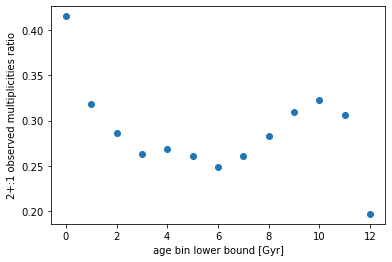

In [29]:
%matplotlib inline

#fig, axes = plt.subplots(3,4, figsize=(25, 20), facecolor='w', edgecolor='k')
#fig.subplots_adjust(hspace = 0.2, wspace=0.4)
#axes = axes.ravel()

ratios_array = np.zeros(13)
samples = 1000
for iteration in range(samples):
    pnum['iso_age_bootstrapped'] = np.random.normal(pnum.iso_age, pnum.iso_age_err)
    ratios = []
    for i, a in enumerate(np.linspace(0,12,13)):
        if a < 12:
            temp = pnum.loc[(pnum.iso_age_bootstrapped > a) & (pnum.iso_age_bootstrapped <= a+1)]
            #print(len(temp))
        else:
            temp = pnum.loc[pnum.iso_age_bootstrapped > a]
            #print(len(temp))

        k_temp = temp.koi_count.value_counts(sort=False)
        #k_temp = k_temp*np.sum(k)/np.sum(k_temp)
        #k_temp = k_temp/k_temp[1]
        k_temp = list(k_temp)
        k_temp += [0.] * (6 - len(k_temp)) # pad with zeros to match length of k

        #print(k_temp)
        #print(k_temp[1]/k_temp[0])
        ratio = (np.sum(k_temp)-k_temp[0])/k_temp[0]
        ratios.append(ratio)
        
    try:
        ratios_array += np.array(ratios)
    except:
        print("can't add first pass to nothing")

print(len(ratios_array))
print(ratios_array/samples)

plt.scatter(np.linspace(0,12,13), ratios_array/samples)
plt.ylabel('2+:1 observed multiplicities ratio')
plt.xlabel('age bin lower bound [Gyr]')
plt.savefig('observed_multiplicities_with_age_bootstrapped.png', format='png')
plt.show()

Similarly for the 2D plot, introduce Teff uncertainties for purposes of spectral type binning.

         0         1         2         3         4         5         6   \
K  0.004000  0.003000  0.014000  0.052500  0.103900  0.156346  0.139849   
G  0.389783  0.277004  0.248265  0.229657  0.246763  0.245770  0.245744   
F  0.447855  0.324092  0.302031  0.295646  0.312172  0.335722  0.330382   

         7         8         9         10        11        12  
K  0.187701  0.244803  0.308888  0.301310  0.258976  0.103430  
G  0.264834  0.287991  0.306807  0.328481  0.310374  0.222206  
F  0.341846  0.464631  0.409092  0.204750  0.092667  0.105833  
       0        1        2       3       4       5       6       7       8   \
K   0.126    0.205    0.355   0.839   1.751   3.168   3.853   3.729   2.988   
G   3.838   12.313   30.870  50.101  61.064  67.001  63.574  55.514  45.696   
F  25.277  123.600  118.057  69.418  42.017  25.855  15.517   8.740   4.996   

       9       10      11      12  
K   2.616   2.480   2.424  15.074  
G  37.029  29.340  22.123  63.189  
F   2.804   1.463 

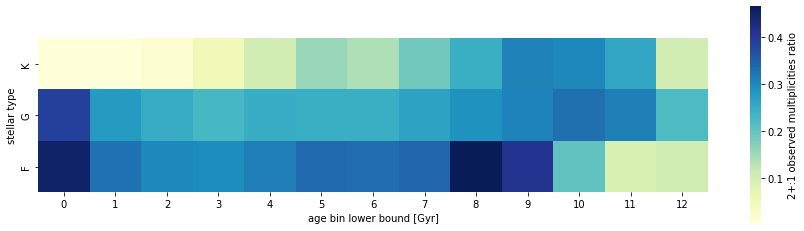

In [30]:
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#fig, axes = plt.subplots(3,4, figsize=(25, 20), facecolor='w', edgecolor='k')
#fig.subplots_adjust(hspace = 0.2, wspace=0.4)
#axes = axes.ravel()

pnum['iso_teff_err'] = 0.5*(pnum.iso_teff_err1 + np.abs(pnum.iso_teff_err2))
ratios_df_array = pd.DataFrame()
counts_df_array = pd.DataFrame()
samples = 1000
for iteration in range(samples):
    pnum['iso_age_bootstrapped'] = np.random.normal(pnum.iso_age, pnum.iso_age_err)
    pnum['iso_teff_bootstrapped'] = np.random.normal(pnum.iso_teff, pnum.iso_teff_err)
    ratios = []
    counts = []
    for i, a in enumerate(np.linspace(0,12,13)):
        if a < 12:
            temp = pnum.loc[(pnum.iso_age_bootstrapped > a) & (pnum.iso_age_bootstrapped <= a+1)]
            temp['stellar_type'] = temp.apply(assign_stellar_type, axis=1)
            temp_k = temp.loc[(temp.iso_teff_bootstrapped > 3900) & (temp.iso_teff_bootstrapped <= 5300)]
            temp_g = temp.loc[(temp.iso_teff_bootstrapped > 5300) & (temp.iso_teff_bootstrapped <= 6000)]
            temp_f = temp.loc[(temp.iso_teff_bootstrapped > 6000) & (temp.iso_teff_bootstrapped <= 7600)]
            #print(len(temp_k), len(temp_g), len(temp_f))
        else:
            temp = pnum.loc[pnum.iso_age_bootstrapped > a]
            temp['stellar_type'] = temp.apply(assign_stellar_type, axis=1)
            temp_k = temp.loc[(temp.iso_teff_bootstrapped > 3900) & (temp.iso_teff_bootstrapped <= 5300)]
            temp_g = temp.loc[(temp.iso_teff_bootstrapped > 5300) & (temp.iso_teff_bootstrapped <= 6000)]
            temp_f = temp.loc[(temp.iso_teff_bootstrapped > 6000) & (temp.iso_teff_bootstrapped <= 7600)]
            #print(len(temp_k), len(temp_g), len(temp_f))
        
        counts.append(len(temp_k))
        counts.append(len(temp_g))
        counts.append(len(temp_f))
        
        k_temp_k = temp_k.koi_count.value_counts(sort=False)
        k_temp_k = list(k_temp_k)
        k_temp_k += [0.] * (6 - len(k_temp_k)) # pad with zeros to match length of k

        k_temp_g = temp_g.koi_count.value_counts(sort=False)
        k_temp_g = list(k_temp_g)
        k_temp_g += [0.] * (6 - len(k_temp_g)) # pad with zeros to match length of k

        k_temp_f = temp_f.koi_count.value_counts(sort=False)
        k_temp_f = list(k_temp_f)
        k_temp_f += [0.] * (6 - len(k_temp_f)) # pad with zeros to match length of k

        ratio_k = (np.sum(k_temp_k)-k_temp_k[0])/k_temp_k[0]
        ratio_g = (np.sum(k_temp_g)-k_temp_g[0])/k_temp_g[0]
        ratio_f = (np.sum(k_temp_f)-k_temp_f[0])/k_temp_f[0]
        ratios.append(ratio_k)
        ratios.append(ratio_g)
        ratios.append(ratio_f)

    ratios = np.array(ratios).reshape(13,3)
    ratios_df = pd.DataFrame(ratios, columns = ['K','G','F']).T.fillna(0)
    
    counts = np.array(counts).reshape(13,3)
    counts_df = pd.DataFrame(counts, columns = ['K','G','F']).T.fillna(0)
    
    if iteration==0:
        ratios_df_array = ratios_df
        counts_df_array = counts_df
    else:
        ratios_df_array += ratios_df
        counts_df_array += counts_df
    #print(ratios_df_array)    
        
print(ratios_df_array/samples)
print(counts_df_array/samples)

plt.figure(figsize=(15, 20))
sns.heatmap(ratios_df_array/samples, square=True, cmap="YlGnBu", cbar_kws={'label': '2+:1 observed multiplicities ratio', "shrink": 0.2})
plt.xlabel('age bin lower bound [Gyr]')
plt.ylabel('stellar type')
plt.savefig('observed_multiplicities_with_age_type_bootstrapped.png', format='png')
plt.show()

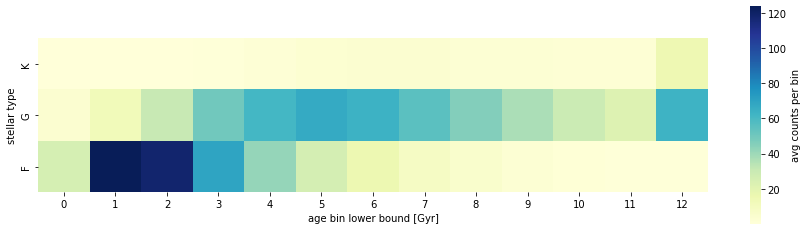

In [31]:
plt.figure(figsize=(15, 20))
sns.heatmap(counts_df_array/samples, square=True, cmap="YlGnBu", cbar_kws={'label': 'avg counts per bin', "shrink": 0.2})
plt.xlabel('age bin lower bound [Gyr]')
plt.ylabel('stellar type')
plt.savefig('counts_per_age_type_bootstrapped.png', format='png')
plt.show()

### Sample from age uncertainties to make distribution of logLs per age bin

Models are locked in; that is, the stellar ages for models are constant. It's the ground truth - the k - that varies now.

In [414]:
def normalized_loglike_bootstrapped(lam, k_temp):
    """
    Calculate Poisson log likelihood, except now using k's (k_temp) binned by stellar ages, sampled using age errors
    0-bin handling courtesy of https://www.aanda.org/articles/aa/pdf/2009/16/aa8472-07.pdf

    Params: 
    - lam: model predictions for transit multiplicity (list of floats)

    Returns: Poisson log likelihood (float)
    """
    
    # normalize
    print(k_temp)
    lam = normalize_young_old(lam, df.f)
    return lam.apply(lambda x: normalized_loglike_bootstrapped2(x, k_temp))
    
def normalized_loglike_bootstrapped2(lam, k_temp):
    # calculate logL
    logL = []
    try:
        for i in range(len(lam)):
            if lam[i]==0:
                term3 = -lgamma(k_temp[i]+1)
                term2 = -lam[i]
                term1 = 0
                logL.append(term1+term2+term3)

            else:
                term3 = -lgamma(k_temp[i]+1)
                term2 = -lam[i]
                term1 = k_temp[i]*np.log(lam[i])
                logL.append(term1+term2+term3)
    except Exception as e:
        print(e)
        return np.nan

    return np.sum(logL)
    
def pad(lam):
    lam += [0.] * (6 - len(lam)) # pad with zeros to match length of k
    return lam

def normalize_young_old(lam, f):
    """
    It's apply functions all the way down
    """
    lam = lam.apply(lambda x: pad(x))
    temp = pd.DataFrame({'transit_multiplicity': lam, 'f': f})
    
    return temp.apply(lambda x: normalize_young_old2(x), axis=1)

def normalize_young_old2(curr_row: pd.Series):
    """
    First, remove fraction of planet-hosting systems from each multiplicity. 
    Then, normalize against sample total planet-hosting systems. 
    """
    #print(curr_row)
    first = curr_row['transit_multiplicity']
    first += [0.] * (6 - len(first)) # pad with zeros to match length of k
    second = curr_row['f']
    #print(first)
    #print(second)
    print(k_temp)
    adfadf
    try:
        # remove previous normalization
        first = [np.array(fl)/second for fl in first]
        
        # normalize against Kepler data s.t. sum of every transit multiplicity is 1025
        return [np.array(fl)*sum(k_temp)/sum(first) for fl in first]
    
    except Exception as e: # return list of N nans, where N is length of transit multiplicity array    
        print(e)
        try: # eg. divide by zero for f=0; we don't care about those
            return np.nan*np.ones(len(first))
        
        except: # eg. accessed one too many levels
            return np.nan

"""
df['young10_transit_multiplicity_normalized'] = normalize_young_old(df.young10_transit_multiplicity, df.f)
df['young15_transit_multiplicity_normalized'] = normalize_young_old(df.young15_transit_multiplicity, df.f)
df['young20_transit_multiplicity_normalized'] = normalize_young_old(df.young20_transit_multiplicity, df.f)
df['young25_transit_multiplicity_normalized'] = normalize_young_old(df.young25_transit_multiplicity, df.f)
df['young30_transit_multiplicity_normalized'] = normalize_young_old(df.young30_transit_multiplicity, df.f)
df['young35_transit_multiplicity_normalized'] = normalize_young_old(df.young35_transit_multiplicity, df.f)
df['young40_transit_multiplicity_normalized'] = normalize_young_old(df.young40_transit_multiplicity, df.f)
df['young45_transit_multiplicity_normalized'] = normalize_young_old(df.young45_transit_multiplicity, df.f)
df['young50_transit_multiplicity_normalized'] = normalize_young_old(df.young50_transit_multiplicity, df.f)
df['old10_transit_multiplicity_normalized'] = normalize_young_old(df.old10_transit_multiplicity, df.f)
df['old15_transit_multiplicity_normalized'] = normalize_young_old(df.old15_transit_multiplicity, df.f)
df['old20_transit_multiplicity_normalized'] = normalize_young_old(df.old20_transit_multiplicity, df.f)
df['old25_transit_multiplicity_normalized'] = normalize_young_old(df.old25_transit_multiplicity, df.f)
df['old30_transit_multiplicity_normalized'] = normalize_young_old(df.old30_transit_multiplicity, df.f)
df['old35_transit_multiplicity_normalized'] = normalize_young_old(df.old35_transit_multiplicity, df.f)
df['old40_transit_multiplicity_normalized'] = normalize_young_old(df.old40_transit_multiplicity, df.f)
df['old45_transit_multiplicity_normalized'] = normalize_young_old(df.old45_transit_multiplicity, df.f)
df['old50_transit_multiplicity_normalized'] = normalize_young_old(df.old50_transit_multiplicity, df.f)
"""

In [468]:
from tqdm import tqdm

samples = 1
young_model_labels = ['young10_transit_multiplicity_normalized','young15_transit_multiplicity_normalized','young20_transit_multiplicity_normalized','young25_transit_multiplicity_normalized',
                'young30_transit_multiplicity_normalized','young35_transit_multiplicity_normalized','young40_transit_multiplicity_normalized','young45_transit_multiplicity_normalized',
                'young50_transit_multiplicity_normalized']
old_model_labels = ['old10_transit_multiplicity_normalized','old15_transit_multiplicity_normalized','old20_transit_multiplicity_normalized','old25_transit_multiplicity_normalized',
             'old30_transit_multiplicity_normalized','old35_transit_multiplicity_normalized','old40_transit_multiplicity_normalized','old45_transit_multiplicity_normalized',
             'old50_transit_multiplicity_normalized']
young_model_labels = ['young10_transit_multiplicity','young15_transit_multiplicity','young20_transit_multiplicity','young25_transit_multiplicity',
                'young30_transit_multiplicity','young35_transit_multiplicity','young40_transit_multiplicity','young45_transit_multiplicity',
                'young50_transit_multiplicity']
old_model_labels = ['old10_transit_multiplicity','old15_transit_multiplicity','old20_transit_multiplicity','old25_transit_multiplicity',
             'old30_transit_multiplicity','old35_transit_multiplicity','old40_transit_multiplicity','old45_transit_multiplicity',
             'old50_transit_multiplicity']

logLs_young_tot_normalized = []
logLs_old_tot_normalized = []
young_lengths_normalized = []
old_lengths_normalized = []
for iteration in tqdm(range(samples)):
    pnum['iso_age_bootstrapped'] = np.random.normal(pnum.iso_age, pnum.iso_age_err)
    logLs_young_normalized = []
    logLs_old_normalized= []
    temp_young_lengths_normalized = []
    temp_old_lengths_normalized = []
    for i, a in enumerate(np.linspace(1,5,9)):
        """
        if a < 5:
            temp = pnum.loc[(pnum.iso_age_bootstrapped > a) & (pnum.iso_age_bootstrapped <= a+0.5)]
            #print(len(temp))
        else:
            temp = pnum.loc[pnum.iso_age_bootstrapped > a]
            #print(len(temp))
        """

        temp_young_normalized = pnum.loc[pnum.iso_age_bootstrapped <= a]
        temp_old_normalized = pnum.loc[pnum.iso_age_bootstrapped > a]
        temp_young_lengths_normalized.append(len(temp_young))
        temp_old_lengths_normalized.append(len(temp_old))
        
        # ground truth
        k_temp_young_normalized = temp_young_normalized.koi_count.value_counts(sort=False)
        #k_temp = k_temp*np.sum(k)/np.sum(k_temp)
        #k_temp = k_temp/k_temp[1]
        k_temp_young_normalized = list(k_temp_young_normalized)
        k_temp_young_normalized += [0.] * (6 - len(k_temp_young_normalized)) # pad with zeros to match length of k
        
        k_temp_old_normalized = temp_old_normalized.koi_count.value_counts(sort=False)
        k_temp_old_normalized = list(k_temp_old_normalized)
        k_temp_old_normalized += [0.] * (6 - len(k_temp_old_normalized)) # pad with zeros to match length of k
        
        # model
        young_df_normalized = df[young_model_labels[i]]
        old_df_normalized = df[old_model_labels[i]]

        print(k_temp_old_normalized, old_df_normalized)
        logLs_young_normalized.append(normalized_loglike_bootstrapped(young_df_normalized, k_temp_young_normalized))
        logLs_old_normalized.append(normalized_loglike_bootstrapped(old_df_normalized, k_temp_old_normalized))
        fadfadf
        
    logLs_young_tot_normalized.append(np.array(logLs_young_normalized))
    logLs_old_tot_normalized.append(np.array(logLs_old_normalized))
    
    young_lengths_normalized.append(np.array(temp_young_lengths_normalized))
    old_lengths_normalized.append(np.array(temp_old_lengths_normalized))
    
logLs_young_tot_normalized = np.array(logLs_young_tot_normalized)
logLs_old_tot_normalized = np.array(logLs_old_tot_normalized)
#print(logLs_young_tot_normalized)

young_lengths_normalized = np.array(young_lengths_normalized)
old_lengths_normalized = np.array(old_lengths_normalized)

  0%|                                                                                                                                                                      | 0/1 [00:00<?, ?it/s]


KeyError: 'young10_transit_multiplicity_normalized'

In [351]:
from tqdm import tqdm

samples = 50
young_model_labels = ['young10_transit_multiplicity','young15_transit_multiplicity','young20_transit_multiplicity','young25_transit_multiplicity',
                'young30_transit_multiplicity','young35_transit_multiplicity','young40_transit_multiplicity','young45_transit_multiplicity',
                'young50_transit_multiplicity']
old_model_labels = ['old10_transit_multiplicity','old15_transit_multiplicity','old20_transit_multiplicity','old25_transit_multiplicity',
             'old30_transit_multiplicity','old35_transit_multiplicity','old40_transit_multiplicity','old45_transit_multiplicity',
             'old50_transit_multiplicity']

logLs_young_tot = []
logLs_old_tot = []
young_lengths = []
old_lengths = []
for iteration in tqdm(range(samples)):
    pnum['iso_age_bootstrapped'] = np.random.normal(pnum.iso_age, pnum.iso_age_err)
    logLs_young = []
    logLs_old = []
    temp_young_lengths = []
    temp_old_lengths = []
    for i, a in enumerate(np.linspace(1,5,9)):
        """
        if a < 5:
            temp = pnum.loc[(pnum.iso_age_bootstrapped > a) & (pnum.iso_age_bootstrapped <= a+0.5)]
            #print(len(temp))
        else:
            temp = pnum.loc[pnum.iso_age_bootstrapped > a]
            #print(len(temp))
        """

        temp_young = pnum.loc[pnum.iso_age_bootstrapped <= a]
        temp_old = pnum.loc[pnum.iso_age_bootstrapped > a]
        temp_young_lengths.append(len(temp_young))
        temp_old_lengths.append(len(temp_old))
        
        # ground truth
        k_temp_young = temp_young.koi_count.value_counts(sort=False)
        #k_temp = k_temp*np.sum(k)/np.sum(k_temp)
        #k_temp = k_temp/k_temp[1]
        k_temp_young = list(k_temp_young)
        k_temp_young += [0.] * (6 - len(k_temp_young)) # pad with zeros to match length of k
        
        k_temp_old = temp_old.koi_count.value_counts(sort=False)
        k_temp_old = list(k_temp_old)
        k_temp_old += [0.] * (6 - len(k_temp_old)) # pad with zeros to match length of k
        
        # model
        young_df = df[young_model_labels[i]]
        old_df = df[old_model_labels[i]]

        logLs_young.append(normalized_loglike_bootstrapped(young_df, k_temp_young))
        logLs_old.append(normalized_loglike_bootstrapped(old_df, k_temp_old))
        
    logLs_young_tot.append(np.array(logLs_young))
    logLs_old_tot.append(np.array(logLs_old))
    
    young_lengths.append(np.array(temp_young_lengths))
    old_lengths.append(np.array(temp_old_lengths))
    
logLs_young_tot = np.array(logLs_young_tot)
logLs_old_tot = np.array(logLs_old_tot)
#print(logLs_young_tot)

young_lengths = np.array(young_lengths)
old_lengths = np.array(old_lengths)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [54:34<00:00, 65.48s/it]


In [417]:
from tqdm import tqdm

samples = 50
young_model_labels = ['young10_transit_multiplicity_normalized','young15_transit_multiplicity_normalized','young20_transit_multiplicity_normalized','young25_transit_multiplicity_normalized',
                'young30_transit_multiplicity_normalized','young35_transit_multiplicity_normalized','young40_transit_multiplicity_normalized','young45_transit_multiplicity_normalized',
                'young50_transit_multiplicity_normalized']
old_model_labels = ['old10_transit_multiplicity_normalized','old15_transit_multiplicity_normalized','old20_transit_multiplicity_normalized','old25_transit_multiplicity_normalized',
             'old30_transit_multiplicity_normalized','old35_transit_multiplicity_normalized','old40_transit_multiplicity_normalized','old45_transit_multiplicity_normalized',
             'old50_transit_multiplicity_normalized']

logLs_young_tot_normalized = []
logLs_old_tot_normalized = []
young_lengths_normalized = []
old_lengths_normalized = []
for iteration in tqdm(range(samples)):
    pnum['iso_age_bootstrapped'] = np.random.normal(pnum.iso_age, pnum.iso_age_err)
    logLs_young_normalized = []
    logLs_old_normalized= []
    temp_young_lengths_normalized = []
    temp_old_lengths_normalized = []
    for i, a in enumerate(np.linspace(1,5,9)):
        """
        if a < 5:
            temp = pnum.loc[(pnum.iso_age_bootstrapped > a) & (pnum.iso_age_bootstrapped <= a+0.5)]
            #print(len(temp))
        else:
            temp = pnum.loc[pnum.iso_age_bootstrapped > a]
            #print(len(temp))
        """

        temp_young_normalized = pnum.loc[pnum.iso_age_bootstrapped <= a]
        temp_old_normalized = pnum.loc[pnum.iso_age_bootstrapped > a]
        temp_young_lengths_normalized.append(len(temp_young))
        temp_old_lengths_normalized.append(len(temp_old))
        
        # ground truth
        k_temp_young_normalized = temp_young_normalized.koi_count.value_counts(sort=False)
        #k_temp = k_temp*np.sum(k)/np.sum(k_temp)
        #k_temp = k_temp/k_temp[1]
        k_temp_young_normalized = list(k_temp_young_normalized)
        k_temp_young_normalized += [0.] * (6 - len(k_temp_young_normalized)) # pad with zeros to match length of k
        
        k_temp_old_normalized = temp_old_normalized.koi_count.value_counts(sort=False)
        k_temp_old_normalized = list(k_temp_old_normalized)
        k_temp_old_normalized += [0.] * (6 - len(k_temp_old_normalized)) # pad with zeros to match length of k
        
        # model
        young_df_normalized = df[young_model_labels[i]]
        old_df_normalized = df[old_model_labels[i]]

        logLs_young_normalized.append(normalized_loglike_bootstrapped(young_df_normalized, k_temp_young_normalized))
        logLs_old_normalized.append(normalized_loglike_bootstrapped(old_df_normalized, k_temp_old_normalized))
        
    logLs_young_tot_normalized.append(np.array(logLs_young_normalized))
    logLs_old_tot_normalized.append(np.array(logLs_old_normalized))
    
    young_lengths_normalized.append(np.array(temp_young_lengths_normalized))
    old_lengths_normalized.append(np.array(temp_old_lengths_normalized))
    
logLs_young_tot_normalized = np.array(logLs_young_tot_normalized)
logLs_old_tot_normalized = np.array(logLs_old_tot_normalized)
#print(logLs_young_tot_normalized)

young_lengths_normalized = np.array(young_lengths_normalized)
old_lengths_normalized = np.array(old_lengths_normalized)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [1:07:43<00:00, 81.26s/it]


In [352]:
logLs_young_tot.shape

(50, 9, 78320)

In [353]:
df['logL_young10_med'] = np.nanmedian(logLs_young_tot, axis=0)[0]
df['logL_young15_med'] = np.nanmedian(logLs_young_tot, axis=0)[1]
df['logL_young20_med'] = np.nanmedian(logLs_young_tot, axis=0)[2]
df['logL_young25_med'] = np.nanmedian(logLs_young_tot, axis=0)[3]
df['logL_young30_med'] = np.nanmedian(logLs_young_tot, axis=0)[4]
df['logL_young35_med'] = np.nanmedian(logLs_young_tot, axis=0)[5]
df['logL_young40_med'] = np.nanmedian(logLs_young_tot, axis=0)[6]
df['logL_young45_med'] = np.nanmedian(logLs_young_tot, axis=0)[7]
df['logL_young50_med'] = np.nanmedian(logLs_young_tot, axis=0)[8]

df['logL_old10_med'] = np.nanmedian(logLs_old_tot, axis=0)[0]
df['logL_old15_med'] = np.nanmedian(logLs_old_tot, axis=0)[1]
df['logL_old20_med'] = np.nanmedian(logLs_old_tot, axis=0)[2]
df['logL_old25_med'] = np.nanmedian(logLs_old_tot, axis=0)[3]
df['logL_old30_med'] = np.nanmedian(logLs_old_tot, axis=0)[4]
df['logL_old35_med'] = np.nanmedian(logLs_old_tot, axis=0)[5]
df['logL_old40_med'] = np.nanmedian(logLs_old_tot, axis=0)[6]
df['logL_old45_med'] = np.nanmedian(logLs_old_tot, axis=0)[7]
df['logL_old50_med'] = np.nanmedian(logLs_old_tot, axis=0)[8]

df['logL_young10_max'] = np.nanmax(logLs_young_tot, axis=0)[0]
df['logL_young15_max'] = np.nanmax(logLs_young_tot, axis=0)[1]
df['logL_young20_max'] = np.nanmax(logLs_young_tot, axis=0)[2]
df['logL_young25_max'] = np.nanmax(logLs_young_tot, axis=0)[3]
df['logL_young30_max'] = np.nanmax(logLs_young_tot, axis=0)[4]
df['logL_young35_max'] = np.nanmax(logLs_young_tot, axis=0)[5]
df['logL_young40_max'] = np.nanmax(logLs_young_tot, axis=0)[6]
df['logL_young45_max'] = np.nanmax(logLs_young_tot, axis=0)[7]
df['logL_young50_max'] = np.nanmax(logLs_young_tot, axis=0)[8]

df['logL_old10_max'] = np.nanmax(logLs_old_tot, axis=0)[0]
df['logL_old15_max'] = np.nanmax(logLs_old_tot, axis=0)[1]
df['logL_old20_max'] = np.nanmax(logLs_old_tot, axis=0)[2]
df['logL_old25_max'] = np.nanmax(logLs_old_tot, axis=0)[3]
df['logL_old30_max'] = np.nanmax(logLs_old_tot, axis=0)[4]
df['logL_old35_max'] = np.nanmax(logLs_old_tot, axis=0)[5]
df['logL_old40_max'] = np.nanmax(logLs_old_tot, axis=0)[6]
df['logL_old45_max'] = np.nanmax(logLs_old_tot, axis=0)[7]
df['logL_old50_max'] = np.nanmax(logLs_old_tot, axis=0)[8]

In [418]:
df['logL_young10_med'] = np.nanmedian(logLs_young_tot_normalized, axis=0)[0]
df['logL_young15_med'] = np.nanmedian(logLs_young_tot_normalized, axis=0)[1]
df['logL_young20_med'] = np.nanmedian(logLs_young_tot_normalized, axis=0)[2]
df['logL_young25_med'] = np.nanmedian(logLs_young_tot_normalized, axis=0)[3]
df['logL_young30_med'] = np.nanmedian(logLs_young_tot_normalized, axis=0)[4]
df['logL_young35_med'] = np.nanmedian(logLs_young_tot_normalized, axis=0)[5]
df['logL_young40_med'] = np.nanmedian(logLs_young_tot_normalized, axis=0)[6]
df['logL_young45_med'] = np.nanmedian(logLs_young_tot_normalized, axis=0)[7]
df['logL_young50_med'] = np.nanmedian(logLs_young_tot_normalized, axis=0)[8]

df['logL_old10_med'] = np.nanmedian(logLs_old_tot_normalized, axis=0)[0]
df['logL_old15_med'] = np.nanmedian(logLs_old_tot_normalized, axis=0)[1]
df['logL_old20_med'] = np.nanmedian(logLs_old_tot_normalized, axis=0)[2]
df['logL_old25_med'] = np.nanmedian(logLs_old_tot_normalized, axis=0)[3]
df['logL_old30_med'] = np.nanmedian(logLs_old_tot_normalized, axis=0)[4]
df['logL_old35_med'] = np.nanmedian(logLs_old_tot_normalized, axis=0)[5]
df['logL_old40_med'] = np.nanmedian(logLs_old_tot_normalized, axis=0)[6]
df['logL_old45_med'] = np.nanmedian(logLs_old_tot_normalized, axis=0)[7]
df['logL_old50_med'] = np.nanmedian(logLs_old_tot_normalized, axis=0)[8]

df['logL_young10_max'] = np.nanmax(logLs_young_tot_normalized, axis=0)[0]
df['logL_young15_max'] = np.nanmax(logLs_young_tot_normalized, axis=0)[1]
df['logL_young20_max'] = np.nanmax(logLs_young_tot_normalized, axis=0)[2]
df['logL_young25_max'] = np.nanmax(logLs_young_tot_normalized, axis=0)[3]
df['logL_young30_max'] = np.nanmax(logLs_young_tot_normalized, axis=0)[4]
df['logL_young35_max'] = np.nanmax(logLs_young_tot_normalized, axis=0)[5]
df['logL_young40_max'] = np.nanmax(logLs_young_tot_normalized, axis=0)[6]
df['logL_young45_max'] = np.nanmax(logLs_young_tot_normalized, axis=0)[7]
df['logL_young50_max'] = np.nanmax(logLs_young_tot_normalized, axis=0)[8]

df['logL_old10_max'] = np.nanmax(logLs_old_tot_normalized, axis=0)[0]
df['logL_old15_max'] = np.nanmax(logLs_old_tot_normalized, axis=0)[1]
df['logL_old20_max'] = np.nanmax(logLs_old_tot_normalized, axis=0)[2]
df['logL_old25_max'] = np.nanmax(logLs_old_tot_normalized, axis=0)[3]
df['logL_old30_max'] = np.nanmax(logLs_old_tot_normalized, axis=0)[4]
df['logL_old35_max'] = np.nanmax(logLs_old_tot_normalized, axis=0)[5]
df['logL_old40_max'] = np.nanmax(logLs_old_tot_normalized, axis=0)[6]
df['logL_old45_max'] = np.nanmax(logLs_old_tot_normalized, axis=0)[7]
df['logL_old50_max'] = np.nanmax(logLs_old_tot_normalized, axis=0)[8]

In [419]:
logLs_young_tot_normalized.shape

(50, 9, 78320)

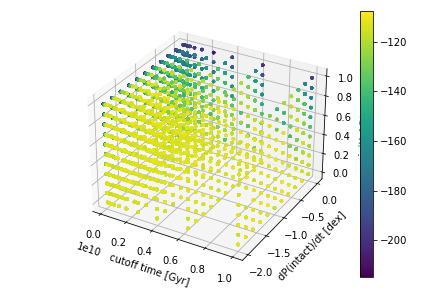

In [420]:
%matplotlib widget

fig = plt.figure()
ax = plt.axes(projection='3d')
im = ax.scatter3D(df.c, df.m, df.b, c=df.logL_young25_max, s=5)
ax.set_xlabel('cutoff time [Gyr]')
#ax.set_xscale('log')
ax.set_ylabel('dP(intact)/dt [dex]')
ax.set_zlabel('initial P(intact)')
fig.colorbar(im, ax=ax)
fig.tight_layout()
plt.show()

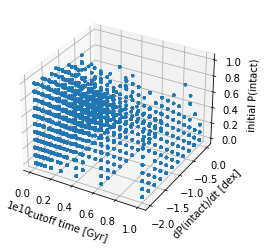

In [421]:
%matplotlib inline

df_keep = df.loc[df.logL_young25_max >= -115]
#df_keep = df
fig = plt.figure()
ax = plt.axes(projection='3d')

#im = ax.scatter3D(df_keep.c, df_keep.m, df_keep.b, c=df_keep.normalized_logL, s=5)
im = ax.scatter3D(df_keep.c, df_keep.m, df_keep.b, s=5)
#im1 = ax.scatter3D(df_keep.loc[df_keep.index==1220].c, df_keep.loc[df_keep.index==1220].m, df_keep.loc[df_keep.index==1220].b, s=8, c='r')
#im2 = ax.scatter3D(df_keep.loc[df_keep.index==73279].c, df_keep.loc[df_keep.index==73279].c, df_keep.loc[df_keep.index==73279].c, s=8, c='purple')
ax.set_xlabel('cutoff time [Gyr]')
#ax.set_xscale('log')
ax.set_ylabel('dP(intact)/dt [dex]')
ax.set_zlabel('initial P(intact)')
#fig.colorbar(im, ax=ax)
#fig.tight_layout()
plt.show()

Two ways to display this.

1) Two sets of subplots showing 3D best logL cube per young-old threshold: young and old. Perhaps colorcode or change opacity depending on len(young) and len(old).

2) Two plots (young and old) showing 3D best logL cube, except summed over all thresholds. But I need to decide whether and how to weigh logL contributions based on len(young) and len(old). Maybe even one plot, summing across young and old.

0.01211231418608919 0.03219512195121951 1328
0.03376766379152138 0.0897560975609756 1328
0.06258028996146082 0.16634146341463416 1328
0.09102587630757937 0.24195121951219511 0
0.11690218388695174 0.31073170731707317 0
0.14094329234721967 0.3746341463414634 0
0.16131400256927877 0.42878048780487804 0
0.18113415305560654 0.4814634146341463 0
0.20022022389429253 0.5321951219512195 0


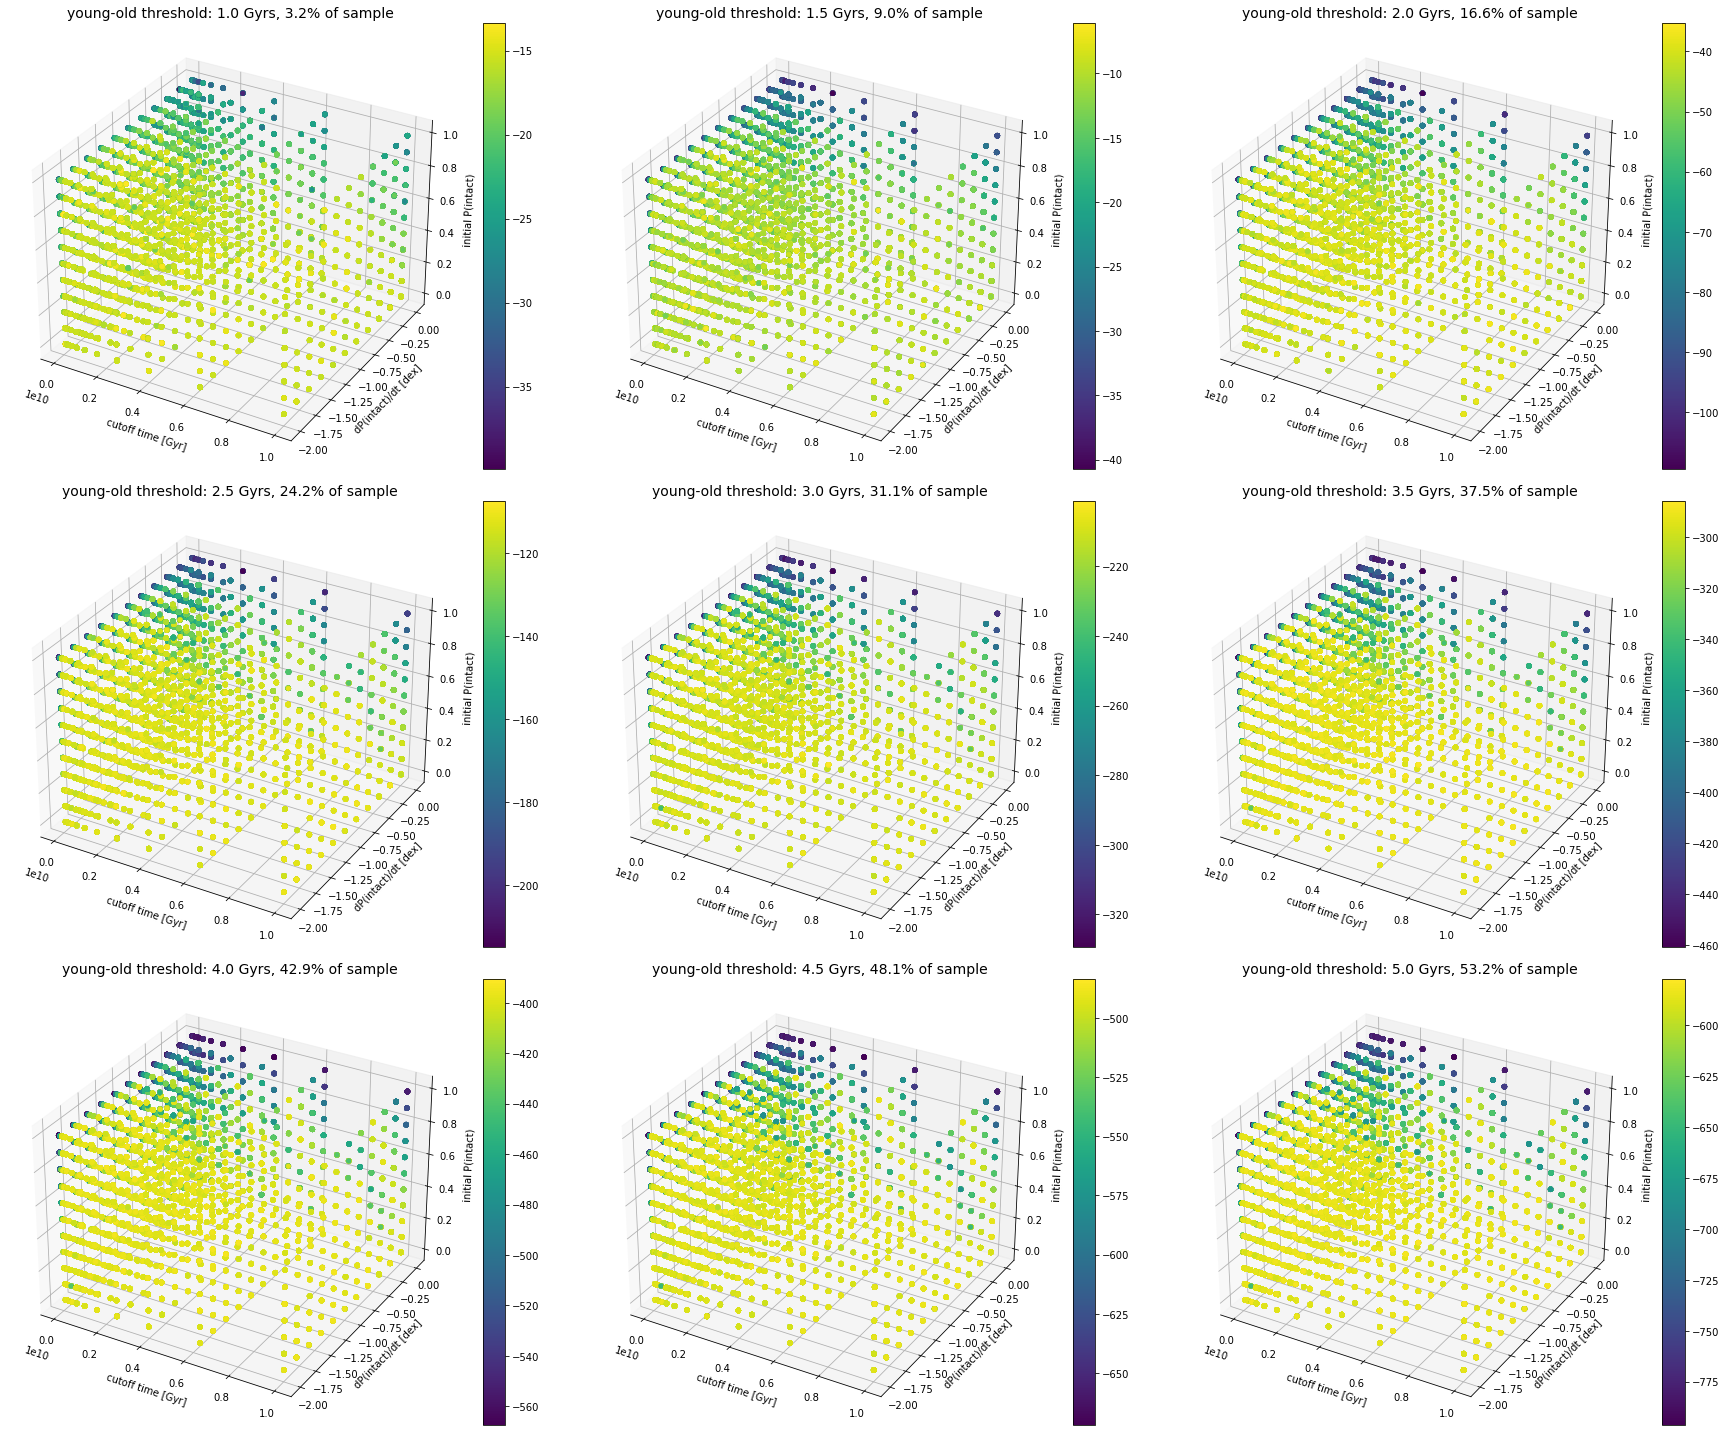

In [422]:
%matplotlib inline

"""
young_logL_labels = ['logL_young10','logL_young15','logL_young20','logL_young25','logL_young30','logL_young35',
                     'logL_young40','logL_young45','logL_young50']
old_logL_labels = ['logL_old10','logL_old15','logL_old20','logL_old25','logL_old30','logL_old35',
                  'logL_old40','logL_old45','logL_old50']
young_logL_labels = ['logL_young10_med','logL_young15_med','logL_young20_med','logL_young25_med','logL_young30_med','logL_young35_med',
                     'logL_young40_med','logL_young45_med','logL_young50_med']
old_logL_labels = ['logL_old10_med','logL_old15_med','logL_old20_med','logL_old25_med','logL_old30_med','logL_old35_med',
                  'logL_old40_med','logL_old45_med','logL_old50_med']
"""
young_logL_labels = ['logL_young10_max','logL_young15_max','logL_young20_max','logL_young25_max','logL_young30_max','logL_young35_max',
                     'logL_young40_max','logL_young45_max','logL_young50_max']
old_logL_labels = ['logL_old10_max','logL_old15_max','logL_old20_max','logL_old25_max','logL_old30_max','logL_old35_max',
                  'logL_old40_max','logL_old45_max','logL_old50_max']

median_young_lengths = np.median(young_lengths, axis=0)
median_old_lengths = np.median(old_lengths, axis=0)

fig = plt.figure(figsize=(25, 20))
#fig, axes = plt.subplots(3,3, figsize=(25, 20), facecolor='w', edgecolor='k')
#fig.subplots_adjust(hspace = 0.2, wspace=0.4)
#axes = axes.ravel()
for i, a in enumerate(np.linspace(1,5,9)):
    ax = fig.add_subplot(3, 3, i+1, projection='3d')
    df_keep = df.loc[df[young_logL_labels[i]] >= -100].drop_duplicates(subset=['m','b','c'])
    print(median_young_lengths[i]/np.sum(median_young_lengths), median_young_lengths[i]/1025, len(df_keep))
    im = ax.scatter3D(df.c, df.m, df.b, depthshade=False, c=df[young_logL_labels[i]])
    #im = ax.scatter3D(df_keep.c, df_keep.m, df_keep.b, depthshade=False)
                    #alpha=2*median_young_lengths[i]/np.sum(median_young_lengths))

    ax.set_title(f"young-old threshold: {a} Gyrs, {np.round(100*median_young_lengths[i]/1025, 1)}% of sample", 
                 fontsize=14)
    ax.set_xlabel('cutoff time [Gyr]')
    ax.set_ylabel('dP(intact)/dt [dex]')
    ax.set_zlabel('initial P(intact)')
    fig.colorbar(im)

fig.tight_layout()
#plt.savefig('young_models.png', format='png')
#plt.savefig('observed_transit_multiplicities_by_age_normalized.png', format='png')
plt.show()

0.15260364587339437 0
0.14352742096761786 0
0.13145142681332206 0
0.11952926697946312 0
0.10868394738866241 0
0.09860779940004614 0
0.09006999461579879 0
0.08176294131220675 0
0.0737635566494885 0


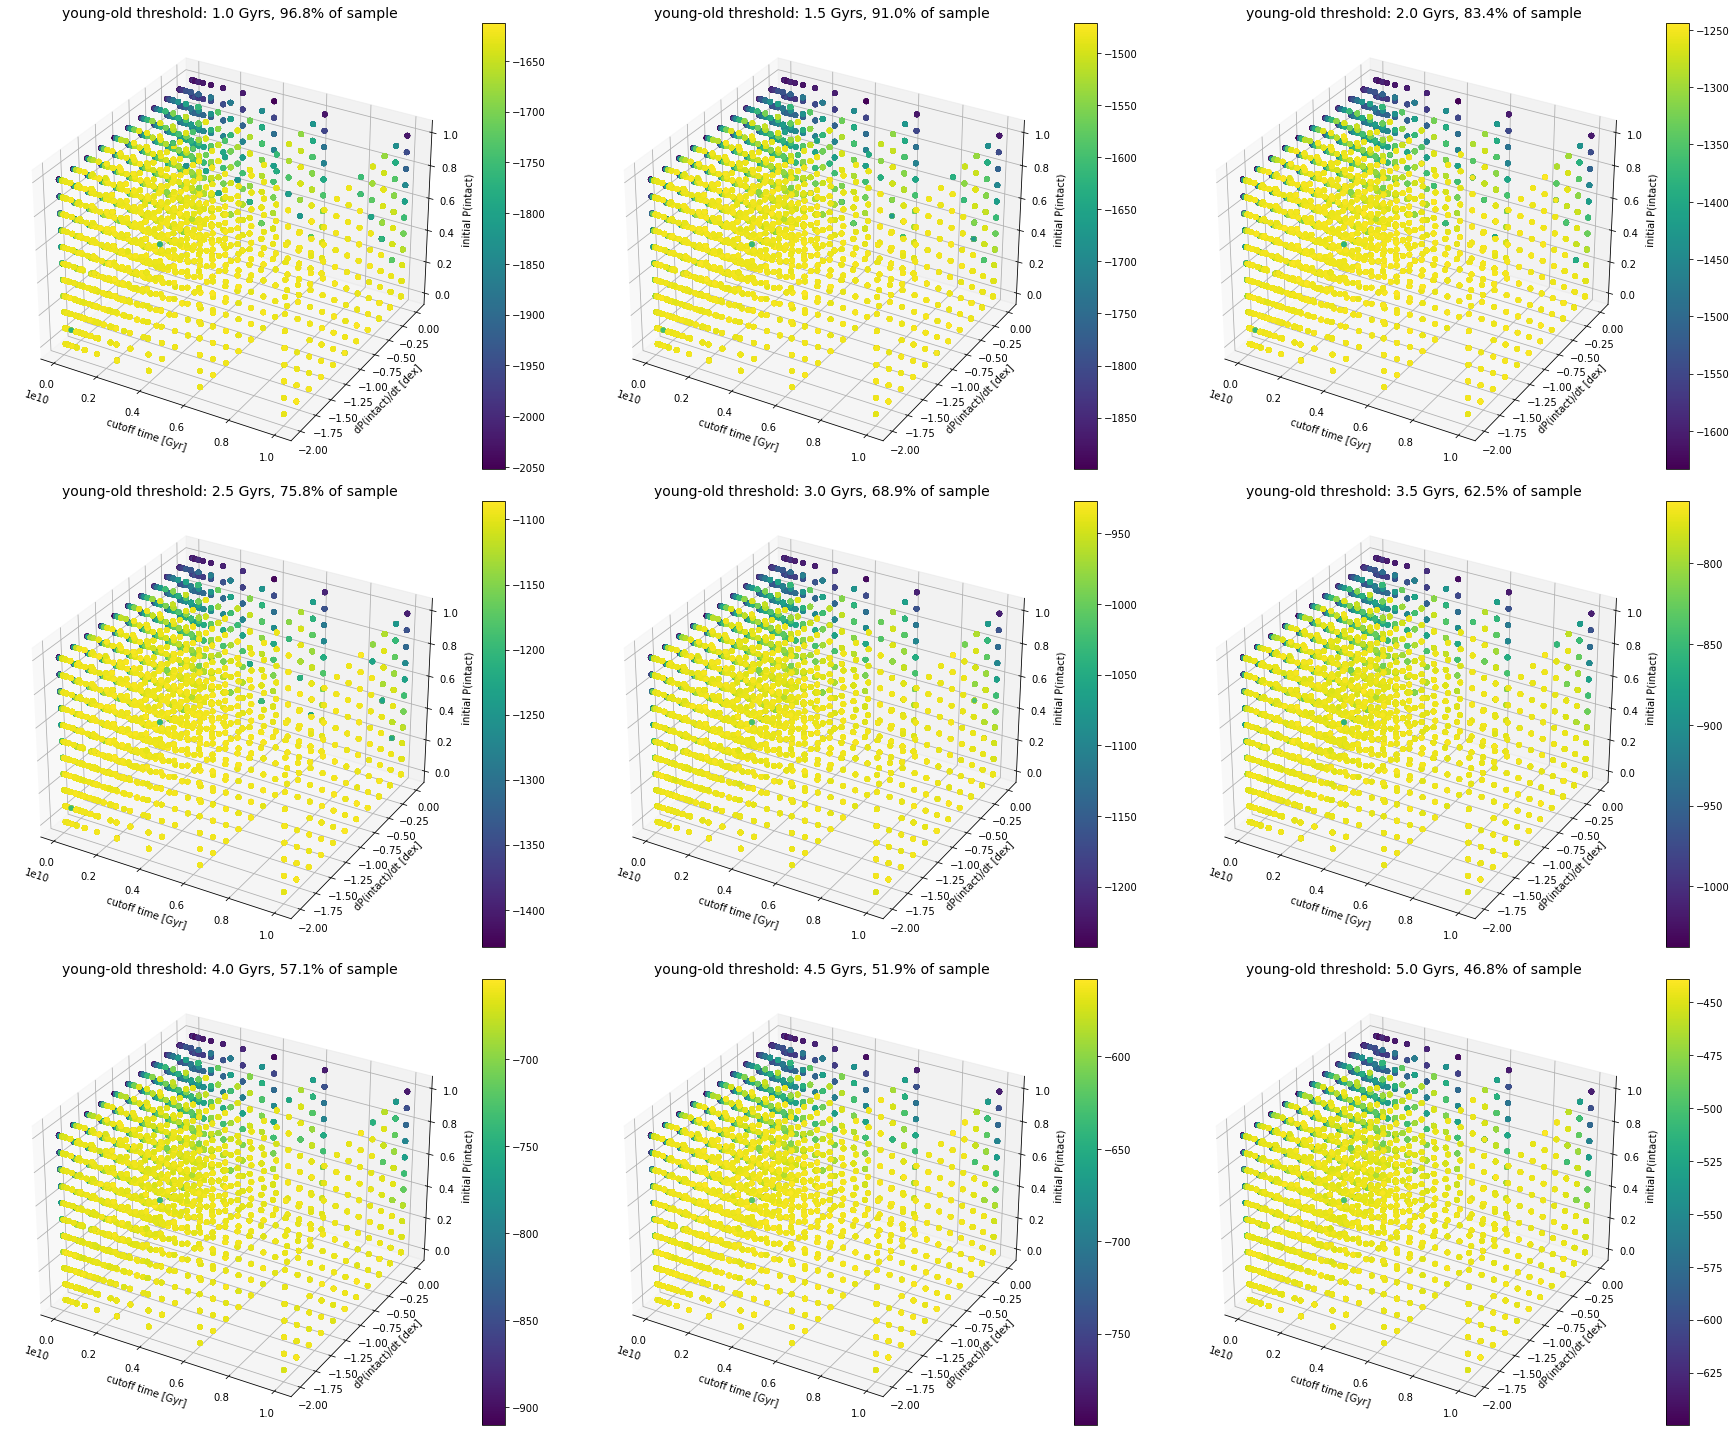

In [384]:
fig = plt.figure(figsize=(25, 20))
#fig, axes = plt.subplots(3,3, figsize=(25, 20), facecolor='w', edgecolor='k')
#fig.subplots_adjust(hspace = 0.2, wspace=0.4)
#axes = axes.ravel()
for i, a in enumerate(np.linspace(1,5,9)):
    ax = fig.add_subplot(3, 3, i+1, projection='3d')
    df_keep = df.loc[df[old_logL_labels[i]] >= -100].drop_duplicates(subset=['m','b','c'])
    print(median_old_lengths[i]/np.sum(median_old_lengths), len(df_keep))
    im = ax.scatter3D(df.c, df.m, df.b, depthshade=False, c=df[old_logL_labels[i]]) 
    #im = ax.scatter3D(df_keep.c, df_keep.m, df_keep.b, depthshade=False) 
                    #alpha=2*median_old_lengths[i]/np.sum(median_old_lengths))

    ax.set_title(f"young-old threshold: {a} Gyrs, {np.round(100*median_old_lengths[i]/1025, 1)}% of sample", fontsize=14)
    ax.set_xlabel('cutoff time [Gyr]')
    ax.set_ylabel('dP(intact)/dt [dex]')
    ax.set_zlabel('initial P(intact)')
    fig.colorbar(im)

fig.tight_layout()
plt.savefig('old_models.png', format='png')
#plt.savefig('observed_transit_multiplicities_by_age_normalized.png', format='png')
plt.show()

Wait, this doesn't tell me anything. The young are eating up all the good models early on, and the old are eating up all the good models late on. I need to combine them and weight by contribution from young and old. 

In [119]:
df[young_logL_labels[0]]*median_young_lengths[0]/np.sum(median_young_lengths) + df[old_logL_labels[0]]*median_old_lengths[0]/np.sum(median_old_lengths)


0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
           ...   
78315   -8.274555
78316   -8.429564
78317   -8.117938
78318   -8.274555
78319   -8.429564
Length: 78320, dtype: float64

Now what if we added the logLs across age thresholds for young and old, weighting logL contributions by the size of the bin?

In [121]:
df[young_logL_labels[0]]*0.1+df[young_logL_labels[1]]*0.2

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
78315   -14.409911
78316   -14.704471
78317   -14.141717
78318   -14.409911
78319   -14.704471
Length: 78320, dtype: float64

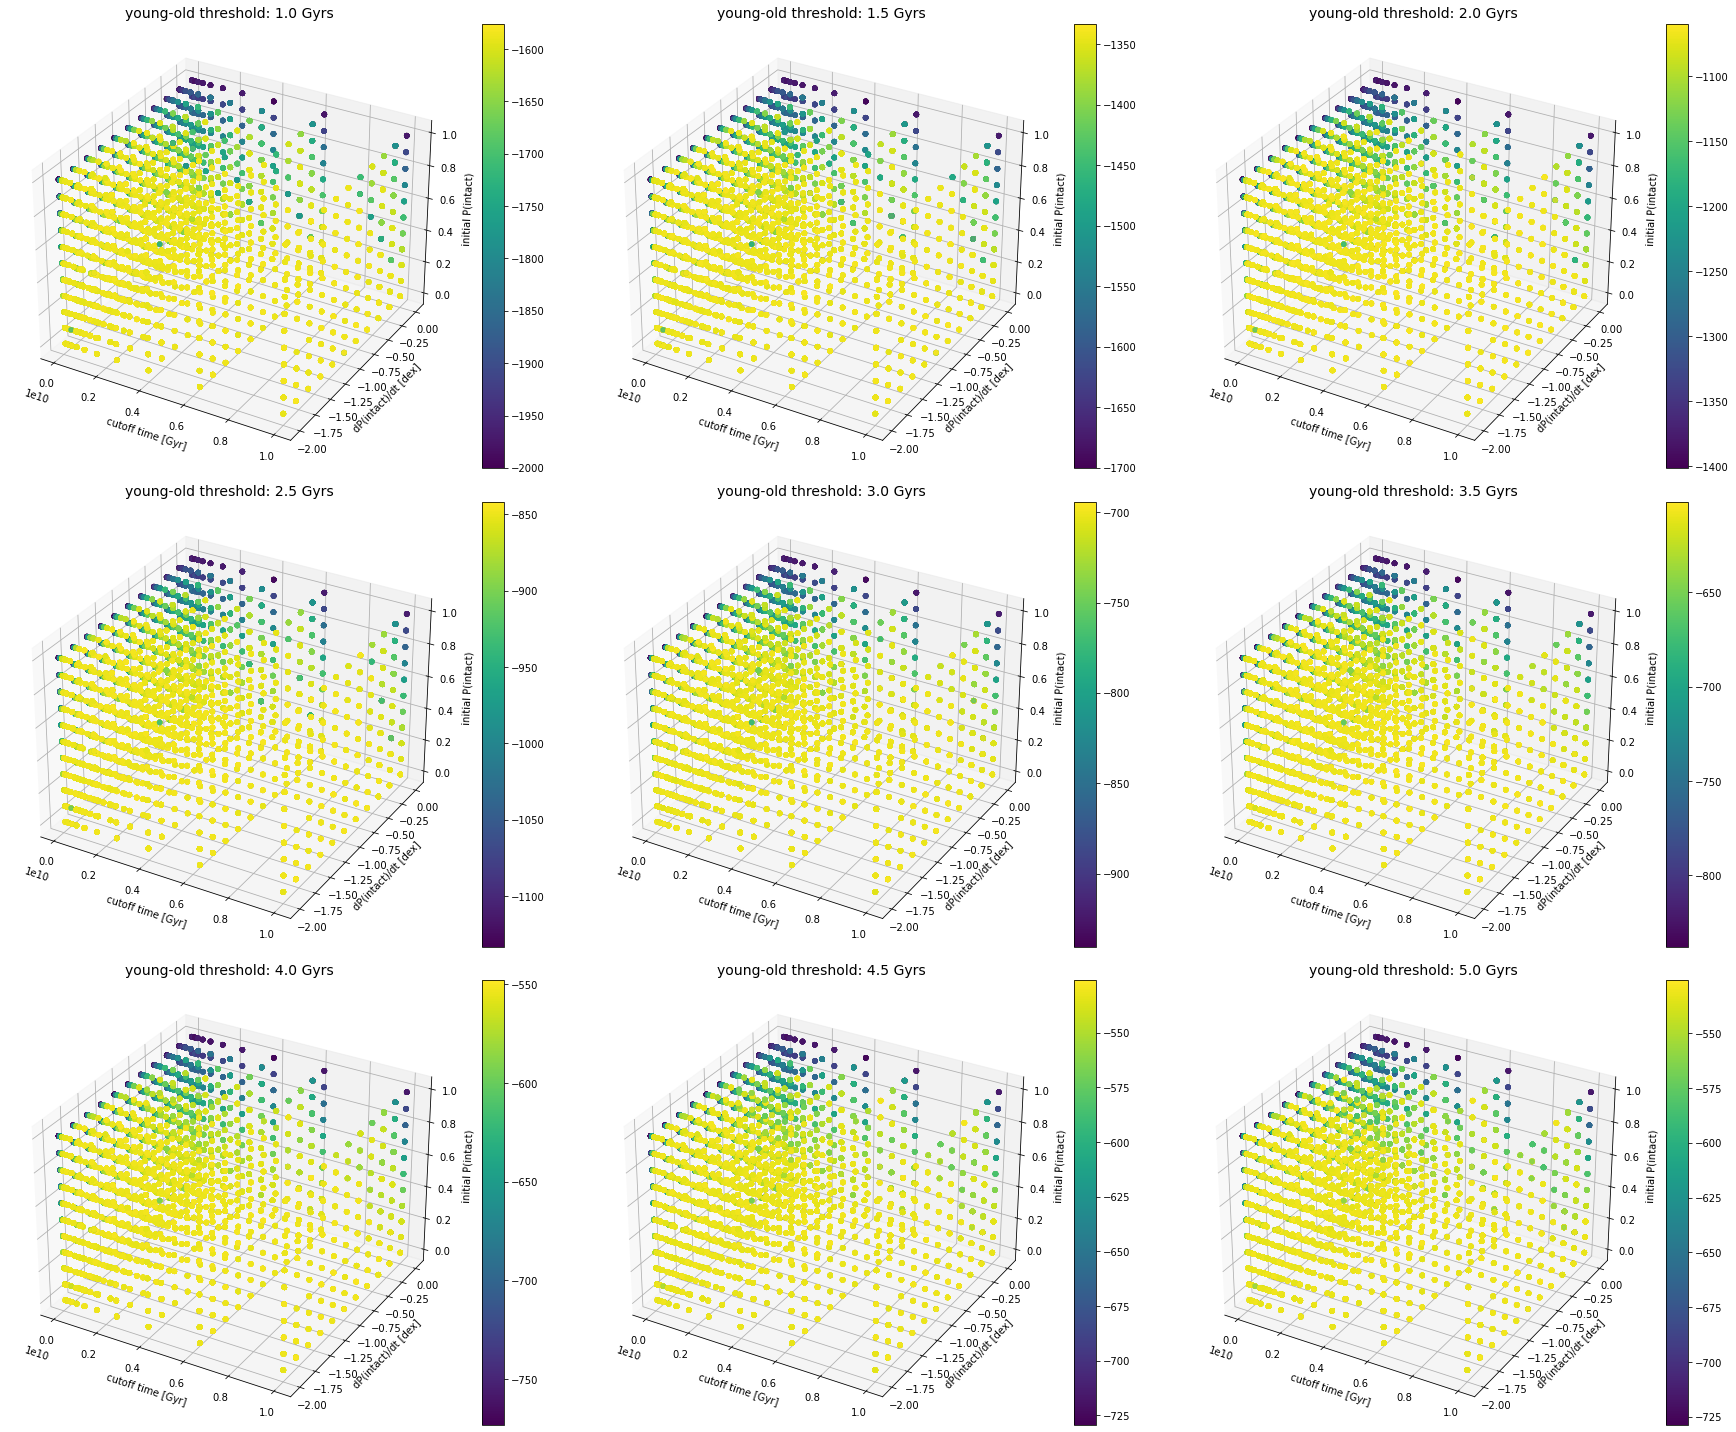

In [441]:
%matplotlib inline 

fig = plt.figure(figsize=(25, 20))
#ax = plt.axes(projection='3d')

young_logL_labels = ['logL_young10_max','logL_young15_max','logL_young20_max','logL_young25_max','logL_young30_max','logL_young35_max',
                     'logL_young40_max','logL_young45_max','logL_young50_max']
old_logL_labels = ['logL_old10_max','logL_old15_max','logL_old20_max','logL_old25_max','logL_old30_max','logL_old35_max',
                  'logL_old40_max','logL_old45_max','logL_old50_max']
logL_old_weighted = pd.DataFrame()
logL_young_weighted = pd.DataFrame()
for i, a in enumerate(np.linspace(1,5,9)):
    ax = fig.add_subplot(3, 3, i+1, projection='3d')
    weight_old = median_old_lengths[i]/1025
    weight_young = median_young_lengths[i]/1025
    
    temp_logL_old = df[old_logL_labels[i]]*weight_old
    temp_logL_young = df[young_logL_labels[i]]*weight_young
    temp_logL = temp_logL_old + temp_logL_young

    """
    if i==0:
        logL_old_weighted = temp_logL_old
        logL_young_weighted = temp_logL_young
    else:
        logL_old_weighted += temp_logL_old
        logL_young_weighted += temp_logL_young
    """
    
    im = ax.scatter3D(df.c, df.m, df.b, c=temp_logL)
    ax.set_title(f"young-old threshold: {a} Gyrs", fontsize=14)
    ax.set_xlabel('cutoff time [Gyr]')
    ax.set_ylabel('dP(intact)/dt [dex]')
    ax.set_zlabel('initial P(intact)')
    fig.colorbar(im)
    
#print(logL_old_weighted)
#print(logL_young_weighted)

"""
df['logL_old_weighted'] = logL_old_weighted
df['logL_young_weighted'] = logL_young_weighted
#df_keep = df.loc[(df['logL_young_weighted'] >= -50)&(df['logL_old_weighted'] >= -50)]
#im = ax.scatter3D(df_keep.c, df_keep.m, df_keep.b)
im = ax.scatter3D(df.c, df.m, df.b, c=df.logL_young_weighted)
ax.set_xlabel('cutoff time [Gyr]')
ax.set_ylabel('dP(intact)/dt [dex]')
ax.set_zlabel('initial P(intact)')
fig.tight_layout()
fig.colorbar(im, ax=ax)
"""
fig.tight_layout()
plt.savefig('weighted_models.png', format='png')
#plt.savefig('observed_transit_multiplicities_by_age_normalized.png', format='png')
plt.show()


Oh no, are we back to needing f to break the degeneracy? 

In [463]:
def better_loglike(lam, k):
    """
    Calculate Poisson log likelihood
    Changed 0 handling from simulate.py to reflect https://www.aanda.org/articles/aa/pdf/2009/16/aa8472-07.pdf

    Params: 
    - lam: model predictions for transit multiplicity (list of ints)
    - k: Kepler transit multiplicity (list of ints); can accept alternate ground truths as well

    Returns: Poisson log likelihood (float)
    """
    
    logL = []
    #print(lam)
    for i in range(len(lam)):
        try:
            if lam[i]==0:
                term3 = -lgamma(k[i]+1)
                term2 = -lam[i]
                term1 = 0
                logL.append(term1+term2+term3)

            else:
                term3 = -lgamma(k[i]+1)
                term2 = -lam[i]
                term1 = k[i]*np.log(lam[i])
                logL.append(term1+term2+term3)
        except Exception as e:
            #print("error here: ", lam)
            #print("error: ", e)
            return lam

    return np.sum(logL)

test_lam = np.array([3902.0, 541.0, 134.0, 73.0, 35.0, 8.0])
test_lam = test_lam*1025/np.sum(test_lam)
print(test_lam)
print(better_loglike(test_lam, np.array([805, 159, 37, 18, 6, 0])))

test_young = pnum.loc[pnum.iso_age <= 1]
test_young_k = list(test_young.koi_count.value_counts(sort=False))
test_young_k += [0.] * (6 - len(test_young_k))
test_young_lam = np.array(df.young10_transit_multiplicity.iloc[78317])
print("best young: ", np.argmax(df.logL_young10_max), np.nanmax(df.logL_young10_max))
print(test_young_k, test_young_lam*np.sum(test_young_k)/np.sum(test_young_lam))
print(better_loglike(test_young_k, test_young_lam*np.sum(test_young_k)/np.sum(test_young_lam)))

test_old = pnum.loc[pnum.iso_age > 1]
test_old_k = list(test_old.koi_count.value_counts(sort=False))
test_old_k += [0.] * (6 - len(test_old_k))
test_old_lam = np.array(df.old10_transit_multiplicity.iloc[12745])
print("best old: ", np.argmax(df.logL_old10_max), np.nanmax(df.logL_old10_max))
print(test_old_k, test_old_lam*np.sum(test_old_k)/np.sum(test_old_lam))
print(better_loglike(test_old_k, test_old_lam*np.sum(test_old_k)/np.sum(test_old_lam)))

print("     ")

test_young = pnum.loc[pnum.iso_age <= 3]
test_young_k = list(test_young.koi_count.value_counts(sort=False))
test_young_k += [0.] * (6 - len(test_young_k))
test_young_lam = np.array(df.young30_transit_multiplicity.iloc[78317])
print(test_young_k, test_young_lam*np.sum(test_young_k)/np.sum(test_young_lam))
print(better_loglike(test_young_k, test_young_lam*np.sum(test_young_k)/np.sum(test_young_lam)))

test_old = pnum.loc[pnum.iso_age > 3]
test_old_k = list(test_old.koi_count.value_counts(sort=False))
test_old_k += [0.] * (6 - len(test_old_k))
test_old_lam = np.array(df.old30_transit_multiplicity.iloc[78317])
print(test_old_k, test_old_lam*np.sum(test_old_k)/np.sum(test_old_lam))
print(better_loglike(test_old_k, test_old_lam*np.sum(test_old_k)/np.sum(test_old_lam)))


[852.23737481 118.16002557  29.26699339  15.94395909   7.64436395
   1.74728319]
-25.34546231472161
best young:  18 -13.381013879523287
[3, 4, 0.0, 0.0, 0.0, 0.0] [2.7125 2.1    0.875  0.7875 0.4375 0.0875]
-3.050930480039863
best old:  12745 -1627.662987514562
[802, 155, 37, 18, 6, 0.0] [913.26368385 104.73631615   0.           0.           0.
   0.        ]
-85.16614436577731
     
[203, 48, 10, 6, 1, 0.0] [100.15176715  63.0997921   49.58835759  32.87318087  18.24740125
   4.03950104]
-156.21266951837018
[602, 111, 27, 12, 5, 0.0] [286.82966373 191.52281825 136.82365893  87.88230584  45.30484388
   8.63670937]
-425.9896289773092


In [413]:
print(np.argmax(df.normalized_logL))
print(df.iloc[63174].normalized_logL)
print(df.iloc[63174].normalized_transit_multiplicity)
print(df.iloc[63174].young10_transit_multiplicity)
print(df.iloc[63174].old10_transit_multiplicity)
print(df.iloc[63174].logL_young10_max)
print(df.iloc[63174].logL_old10_max)
print(old_df)

63174
-17.283792564877665
[829.7721095546729, 129.6518921179176, 38.14551536692453, 16.92975120217437, 8.786326573280368, 1.7144051850303157]
[4.7, 1.1, 0.2, 0.30000000000000004, 0.0, 0.0]
[382.5, 59.400000000000006, 17.6, 7.6000000000000005, 4.1000000000000005, 0.8]
-13.079118673495508
-1623.3093797070503
0                           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
1                           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
2                           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
3                           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
4                           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
                               ...                        
78315    [1130.4, 785.7, 541.8000000000001, 378.0, 166....
78316    [1102.5, 748.8000000000001, 579.6, 392.4000000...
78317           [1275.0, 856.0, 616.0, 409.0, 207.0, 36.0]
78318           [1256.0, 873.0, 602.0, 420.0, 185.0, 35.0]
78319           [1225.0, 832.0, 644.0, 436.0, 186.0, 34.0]
Name: old50_transit_multiplicity, Length: 7

Wait, there are a couple extra dimensions that I've introduced that I'm abstracting over in a personally unsatisfactory way. First, I'm taking the median logLs from the 100 samples per model tuple. I think that's objectively fine, although the ideal would be to then show results in a corner plot instead of a 3D color plot. But model samples are still discretized...

Second, I'm not using f, so when I plot the df and df_keep 3D heatmaps, if any of the 10 samples falls above the logL cutoff, the whole tuple gets counted. So I need to either use a median, or a corner plot, or re-introduce f. My gut tells me re-introducing f will be the riskiest option, so naturally that's what we'll do.

In [170]:
def better_loglike_apply(lam, k_temp):
    return lam.apply(lambda x: better_loglike_apply2(x, k_temp))

def better_loglike_apply2(lam, k_temp):
    """
    Calculate Poisson log likelihood
    Changed 0 handling from simulate.py to reflect https://www.aanda.org/articles/aa/pdf/2009/16/aa8472-07.pdf

    Params: 
    - lam: model predictions for transit multiplicity (list of ints)
    - k: Kepler transit multiplicity (list of ints); can accept alternate ground truths as well

    Returns: Poisson log likelihood (float)
    """
    k_temp += [0.] * (6 - len(k_temp))
    logL = []
    for i in range(len(lam)):
        try:
            if lam[i]==0:
                term3 = -lgamma(k_temp[i]+1)
                term2 = -lam[i]
                term1 = 0
                logL.append(term1+term2+term3)

            else:
                term3 = -lgamma(k_temp[i]+1)
                term2 = -lam[i]
                term1 = k_temp[i]*np.log(lam[i])
                logL.append(term1+term2+term3)
        except Exception as e:
            #print("error here: ", lam)
            print("error: ", e)
            fadfadf
            return lam
    
    return np.sum(logL)

samples = 100
young_model_labels = ['young10_transit_multiplicity','young15_transit_multiplicity','young20_transit_multiplicity','young25_transit_multiplicity',
                'young30_transit_multiplicity','young35_transit_multiplicity','young40_transit_multiplicity','young45_transit_multiplicity',
                'young50_transit_multiplicity']
old_model_labels = ['old10_transit_multiplicity','old15_transit_multiplicity','old20_transit_multiplicity','old25_transit_multiplicity',
             'old30_transit_multiplicity','old35_transit_multiplicity','old40_transit_multiplicity','old45_transit_multiplicity',
             'old50_transit_multiplicity']

logLs_young_tot = []
logLs_old_tot = []
young_lengths = []
old_lengths = []
for iteration in tqdm(range(samples)):
    pnum['iso_age_bootstrapped'] = np.random.normal(pnum.iso_age, pnum.iso_age_err)
    logLs_young = []
    logLs_old = []
    temp_young_lengths = []
    temp_old_lengths = []
    for i, a in enumerate(np.linspace(1,5,9)):
        """
        if a < 5:
            temp = pnum.loc[(pnum.iso_age_bootstrapped > a) & (pnum.iso_age_bootstrapped <= a+0.5)]
            #print(len(temp))
        else:
            temp = pnum.loc[pnum.iso_age_bootstrapped > a]
            #print(len(temp))
        """

        temp_young = pnum.loc[pnum.iso_age_bootstrapped <= a]
        temp_old = pnum.loc[pnum.iso_age_bootstrapped > a]
        temp_young_lengths.append(len(temp_young))
        temp_old_lengths.append(len(temp_old))
        
        # ground truth
        k_temp_young = temp_young.koi_count.value_counts(sort=False)
        #k_temp = k_temp*np.sum(k)/np.sum(k_temp)
        #k_temp = k_temp/k_temp[1]
        k_temp_young = list(k_temp_young)
        k_temp_young += [0.] * (6 - len(k_temp_young)) # pad with zeros to match length of k
        
        k_temp_old = temp_old.koi_count.value_counts(sort=False)
        k_temp_old = list(k_temp_old)
        k_temp_old += [0.] * (6 - len(k_temp_old)) # pad with zeros to match length of k
        
        # model
        young_df = df[young_model_labels[i]]
        old_df = df[old_model_labels[i]]
        logLs_young.append(better_loglike_apply(young_df, k_temp_young))
        logLs_old.append(better_loglike_apply(old_df, k_temp_old))
        
    logLs_young_tot.append(np.array(logLs_young))
    logLs_old_tot.append(np.array(logLs_old))
    
    young_lengths.append(np.array(temp_young_lengths))
    old_lengths.append(np.array(temp_old_lengths))
    
logLs_young_tot = np.array(logLs_young_tot)
logLs_old_tot = np.array(logLs_old_tot)
#print(logLs_young_tot)

young_lengths = np.array(young_lengths)
old_lengths = np.array(old_lengths)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [27:30<00:00, 16.51s/it]


In [171]:
df['logL_young10'] = np.nanmedian(logLs_young_tot, axis=0)[0]
df['logL_young15'] = np.nanmedian(logLs_young_tot, axis=0)[1]
df['logL_young20'] = np.nanmedian(logLs_young_tot, axis=0)[2]
df['logL_young25'] = np.nanmedian(logLs_young_tot, axis=0)[3]
df['logL_young30'] = np.nanmedian(logLs_young_tot, axis=0)[4]
df['logL_young35'] = np.nanmedian(logLs_young_tot, axis=0)[5]
df['logL_young40'] = np.nanmedian(logLs_young_tot, axis=0)[6]
df['logL_young45'] = np.nanmedian(logLs_young_tot, axis=0)[7]
df['logL_young50'] = np.nanmedian(logLs_young_tot, axis=0)[8]

df['logL_old10'] = np.nanmedian(logLs_old_tot, axis=0)[0]
df['logL_old15'] = np.nanmedian(logLs_old_tot, axis=0)[1]
df['logL_old20'] = np.nanmedian(logLs_old_tot, axis=0)[2]
df['logL_old25'] = np.nanmedian(logLs_old_tot, axis=0)[3]
df['logL_old30'] = np.nanmedian(logLs_old_tot, axis=0)[4]
df['logL_old35'] = np.nanmedian(logLs_old_tot, axis=0)[5]
df['logL_old40'] = np.nanmedian(logLs_old_tot, axis=0)[6]
df['logL_old45'] = np.nanmedian(logLs_old_tot, axis=0)[7]
df['logL_old50'] = np.nanmedian(logLs_old_tot, axis=0)[8]

0.01211231418608919 1328 [0.1]
0.03376766379152138 1328 [0.1 0.2]
0.06258028996146082 1251 [0.2]
0.09102587630757937 1165 [0.2 0.3]
0.11690218388695174 1028 [0.2 0.3]
0.14094329234721967 304 [0.2 0.3]
0.16131400256927877 279 [0.2]
0.18113415305560654 249 [0.2]
0.20022022389429253 232 [0.2]


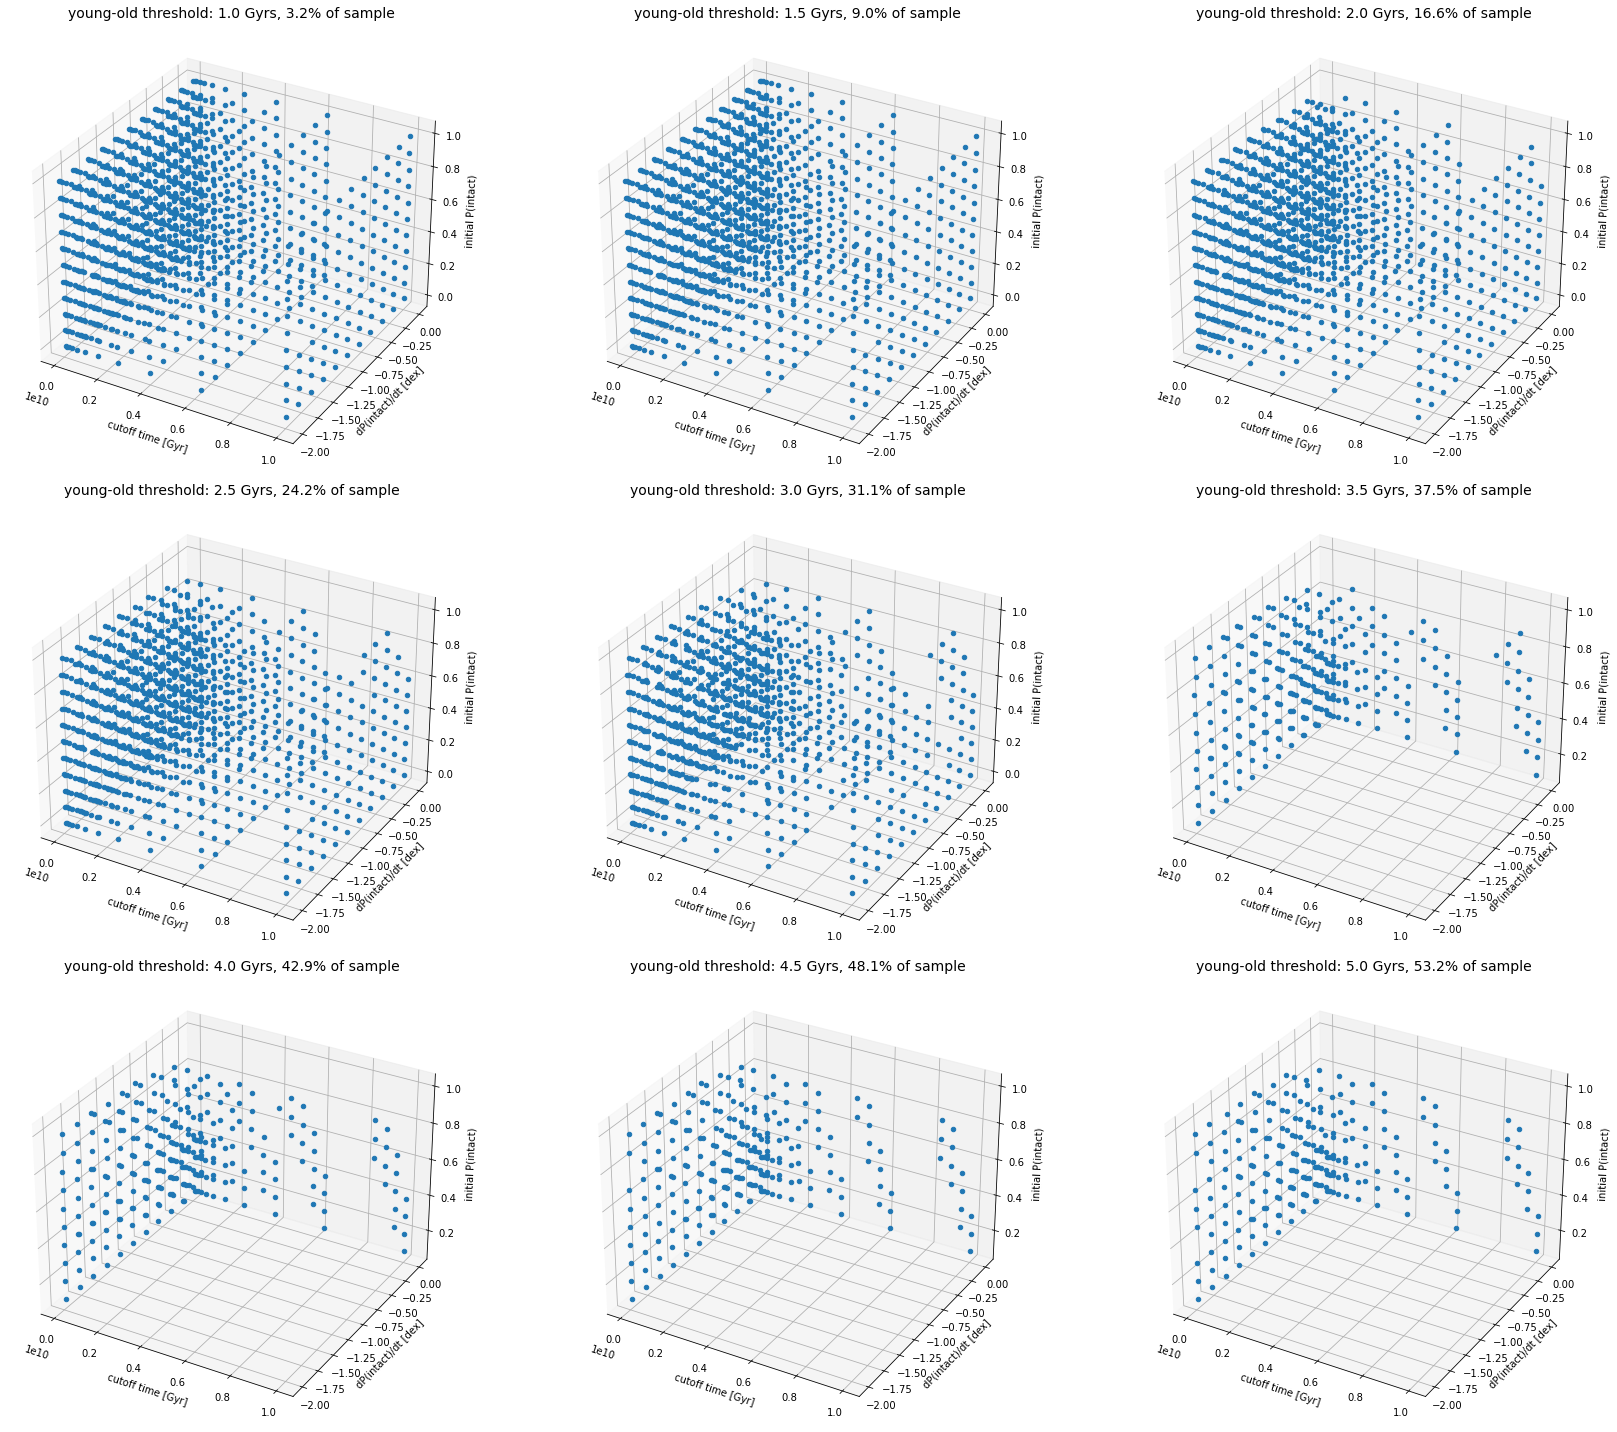

In [457]:
%matplotlib inline

young_logL_labels = ['logL_young10','logL_young15','logL_young20','logL_young25','logL_young30','logL_young35',
                     'logL_young40','logL_young45','logL_young50']
old_logL_labels = ['logL_old10','logL_old15','logL_old20','logL_old25','logL_old30','logL_old35',
                  'logL_old40','logL_old45','logL_old50']
median_young_lengths = np.median(young_lengths, axis=0)
median_old_lengths = np.median(old_lengths, axis=0)

fig = plt.figure(figsize=(25, 20))
#fig, axes = plt.subplots(3,3, figsize=(25, 20), facecolor='w', edgecolor='k')
#fig.subplots_adjust(hspace = 0.2, wspace=0.4)
#axes = axes.ravel()
for i, a in enumerate(np.linspace(1,5,9)):
    ax = fig.add_subplot(3, 3, i+1, projection='3d')
    df_keep = df.loc[df[young_logL_labels[i]] >= -50].drop_duplicates(subset=['m','b','c'])
    print(median_young_lengths[i]/np.sum(median_young_lengths), len(df_keep), df_keep.f.unique())
    #im = ax.scatter3D(df.c, df.m, df.b, depthshade=False, c=df[young_logL_labels[i]])
    im = ax.scatter3D(df_keep.c, df_keep.m, df_keep.b, depthshade=False)
    ax.set_title(f"young-old threshold: {a} Gyrs, {np.round(100*median_young_lengths[i]/1025, 1)}% of sample", fontsize=14)
    ax.set_xlabel('cutoff time [Gyr]')
    ax.set_ylabel('dP(intact)/dt [dex]')
    ax.set_zlabel('initial P(intact)')
    #fig.colorbar(im)

fig.tight_layout()
plt.savefig('young_models_good_f.png', format='png')
#plt.savefig('observed_transit_multiplicities_by_age_normalized.png', format='png')
plt.show()

0.15260364587339437 262 [0.2]
0.14352742096761786 273 [0.2]
0.13145142681332206 281 [0.2]
0.11952926697946312 284 [0.2]
0.10868394738866241 359 [0.2]
0.09860779940004614 1113 [0.2]
0.09006999461579879 1136 [0.2]
0.08176294131220675 1154 [0.2]
0.0737635566494885 1161 [0.2]


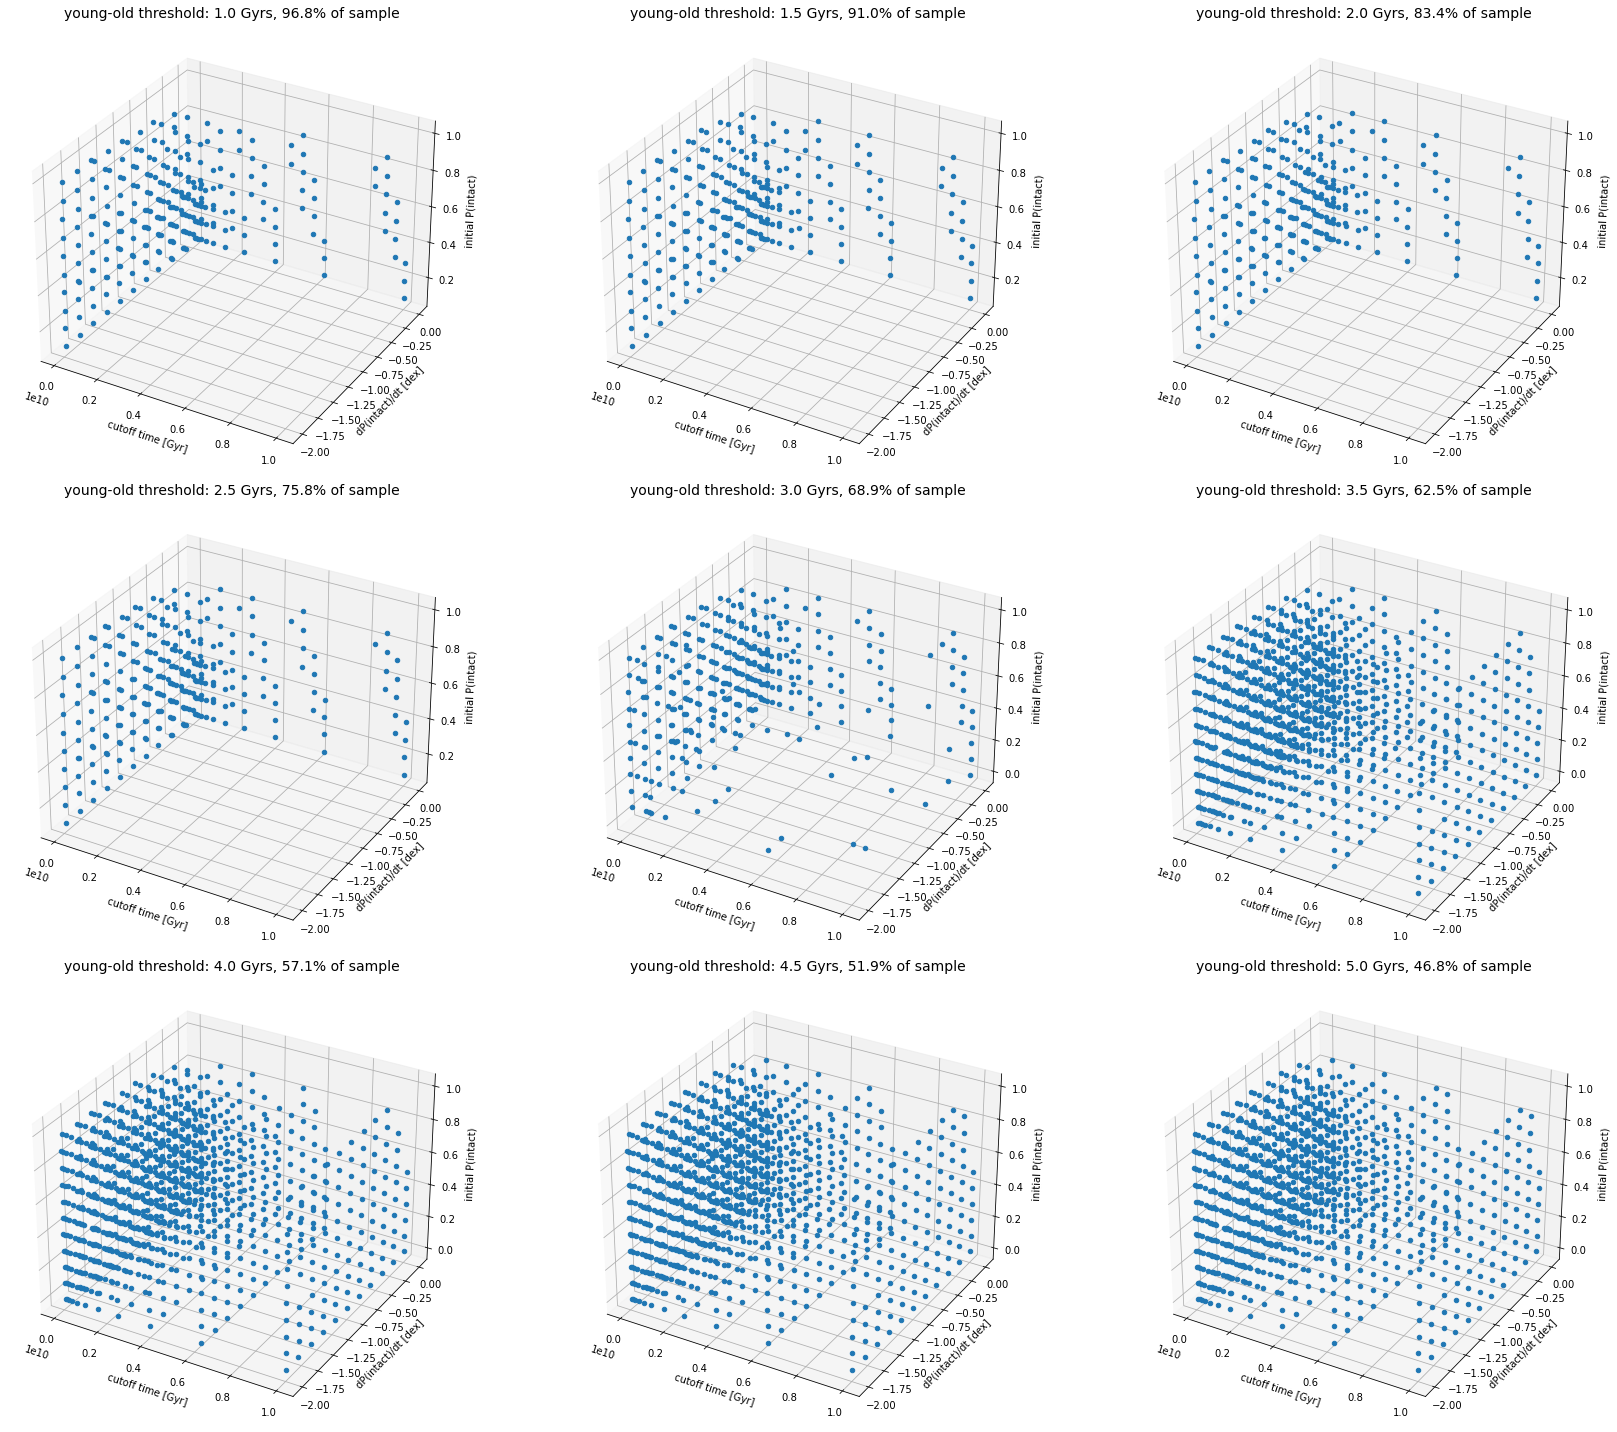

In [454]:
fig = plt.figure(figsize=(25, 20))
#fig, axes = plt.subplots(3,3, figsize=(25, 20), facecolor='w', edgecolor='k')
#fig.subplots_adjust(hspace = 0.2, wspace=0.4)
#axes = axes.ravel()
for i, a in enumerate(np.linspace(1,5,9)):
    ax = fig.add_subplot(3, 3, i+1, projection='3d')
    df_keep = df.loc[df[old_logL_labels[i]] >= -100].drop_duplicates(subset=['m','b','c'])
    print(median_old_lengths[i]/np.sum(median_old_lengths), len(df_keep), df_keep.f.unique())
    #im = ax.scatter3D(df.c, df.m, df.b, depthshade=False, c=df[old_logL_labels[i]])
    im = ax.scatter3D(df_keep.c, df_keep.m, df_keep.b, depthshade=False)
    ax.set_title(f"young-old threshold: {a} Gyrs, {np.round(100*median_old_lengths[i]/1025, 1)}% of sample", fontsize=14)
    ax.set_xlabel('cutoff time [Gyr]')
    ax.set_ylabel('dP(intact)/dt [dex]')
    ax.set_zlabel('initial P(intact)')
    #fig.colorbar(im)

fig.tight_layout()
plt.savefig('old_models_good_f.png', format='png')
#plt.savefig('observed_transit_multiplicities_by_age_normalized.png', format='png')
plt.show()

[0.2]
[0.2]
[0.2]
[0.2]
[0.2 0.3]
[0.2 0.3]
[0.2 0.3]
[0.2 0.3]
[0.2 0.3]


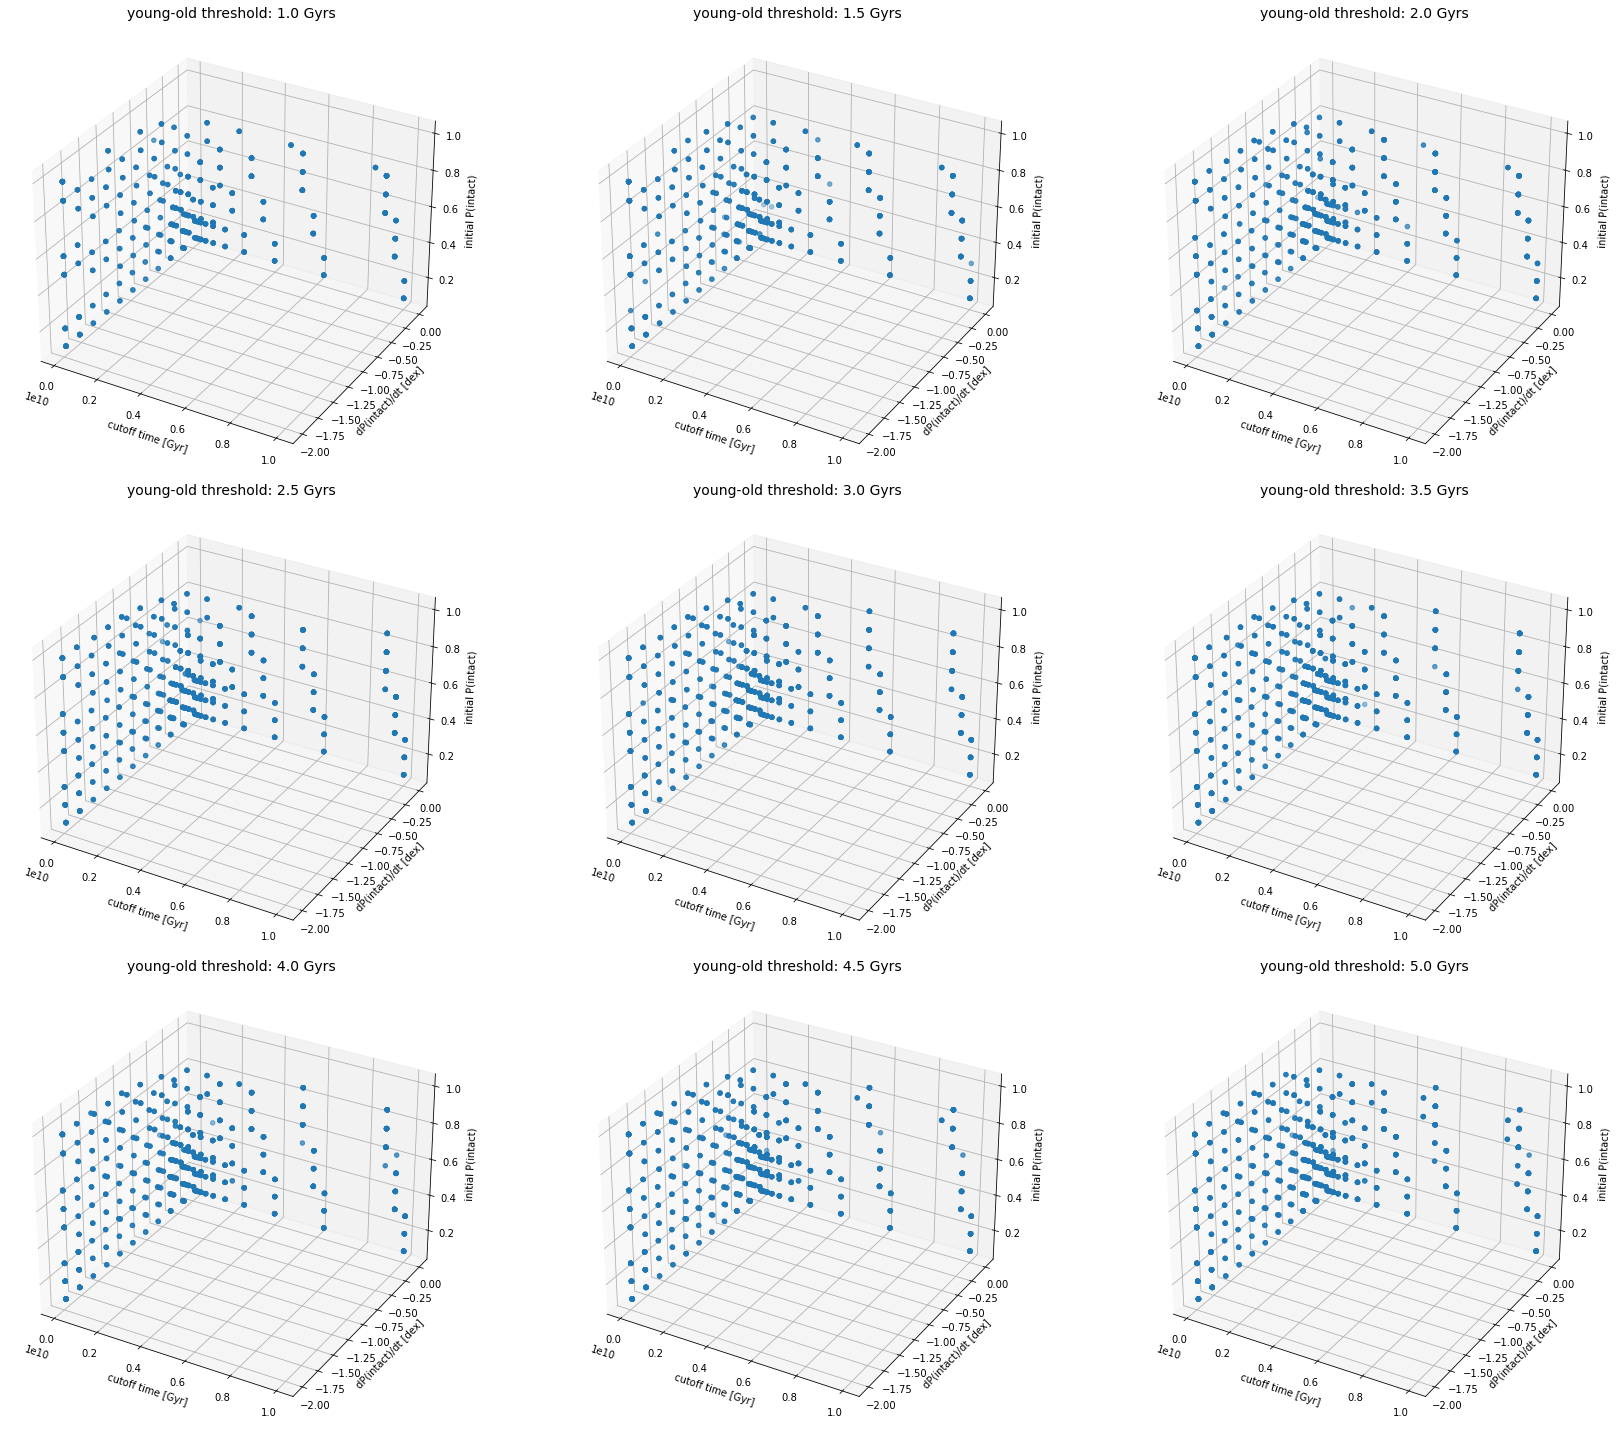

In [456]:
%matplotlib widget

fig = plt.figure(figsize=(25, 20))
for i, a in enumerate(np.linspace(1,5,9)):
    ax = fig.add_subplot(3, 3, i+1, projection='3d')
    weight_old = median_old_lengths[i]/1025
    weight_young = median_young_lengths[i]/1025
    
    temp_logL_old = df[old_logL_labels[i]]*weight_old
    temp_logL_young = df[young_logL_labels[i]]*weight_young
    temp_logL = temp_logL_old + temp_logL_young

    """
    if i==0:
        logL_old_weighted = temp_logL_old
        logL_young_weighted = temp_logL_young
    else:
        logL_old_weighted += temp_logL_old
        logL_young_weighted += temp_logL_young
    """
    
    temp_df = df
    temp_df['temp_logL'] = temp_logL
    df_keep = temp_df.loc[temp_df.temp_logL > -50]
    print(df_keep.f.unique())
    
    #im = ax.scatter3D(df.c, df.m, df.b, c=temp_logL)
    im = ax.scatter3D(df_keep.c, df_keep.m, df_keep.b)
    ax.set_title(f"young-old threshold: {a} Gyrs", fontsize=14)
    ax.set_xlabel('cutoff time [Gyr]')
    ax.set_ylabel('dP(intact)/dt [dex]')
    ax.set_zlabel('initial P(intact)')
    #fig.colorbar(im)
    
fig.tight_layout()
plt.savefig('weighted_models_f.png', format='png')
#plt.savefig('observed_transit_multiplicities_by_age_normalized.png', format='png')
plt.show()

Corner

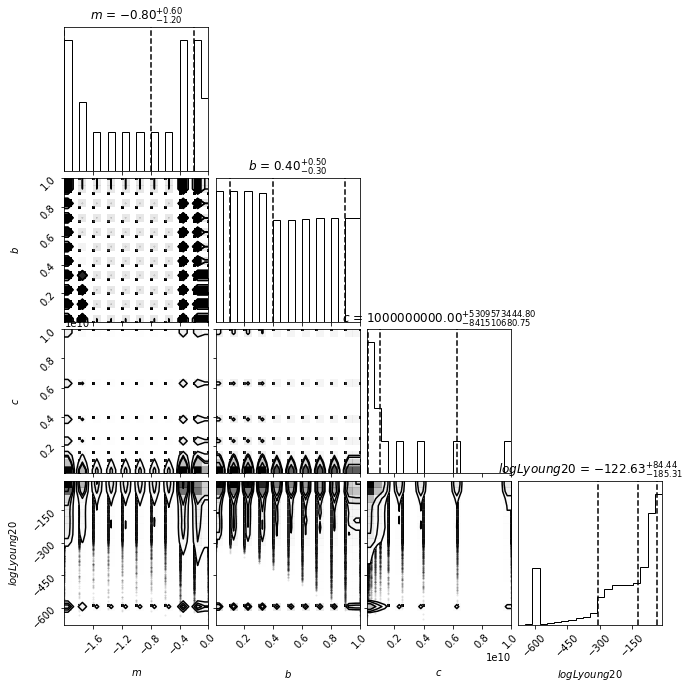

In [186]:
import corner

figure = corner.corner(df[['m','b','c','logL_young20']], labels=[r"$m$", r"$b$", r"$c$", r"$logL young 20$"],
                       quantiles=[0.16, 0.5, 0.84],
                       show_titles=True, title_kwargs={"fontsize": 12})

Worse, we need intact frac.